In [ ]:
!pip install -r requirements.txt

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

### Базовое знакомство с данными

In [2]:
person = pd.read_csv("data/person.csv", index_col=0)
person.head()

,person_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [3]:
person.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189118 entries, 0 to 189117
Data columns (total 41 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  189118 non-null  object
 1   char_1     189118 non-null  object
 2   group_1    189118 non-null  object
 3   char_2     189118 non-null  object
 4   date       189118 non-null  object
 5   char_3     189118 non-null  object
 6   char_4     189118 non-null  object
 7   char_5     189118 non-null  object
 8   char_6     189118 non-null  object
 9   char_7     189118 non-null  object
 10  char_8     189118 non-null  object
 11  char_9     189118 non-null  object
 12  char_10    189118 non-null  bool  
 13  char_11    189118 non-null  bool  
 14  char_12    189118 non-null  bool  
 15  char_13    189118 non-null  bool  
 16  char_14    189118 non-null  bool  
 17  char_15    189118 non-null  bool  
 18  char_16    189118 non-null  bool  
 19  char_17    189118 non-null  bool  
 20  char

In [4]:
action_train = pd.read_csv("data/action_train.csv", index_col=0)
action_train.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,result
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [7]:
action_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2197291 entries, 0 to 2197290
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   person_id    object
 1   action_id    object
 2   date         object
 3   action_type  object
 4   char_1       object
 5   char_2       object
 6   char_3       object
 7   char_4       object
 8   char_5       object
 9   char_6       object
 10  char_7       object
 11  char_8       object
 12  char_9       object
 13  char_10      object
 14  result       int64 
dtypes: int64(1), object(14)
memory usage: 268.2+ MB


In [8]:
action_train.shape

(2197291, 15)

Данных достаточно много, возможно придется использовать не весь временной ряд для обучения модели.
Взглянем на таргет, оценим дисбаланс классов.

In [9]:
action_train['result'].value_counts()

0    1221794
1     975497
Name: result, dtype: int64

### Работа с пропусками

Оценим кол-во пропусков в датасетах.

In [10]:
person.isna().sum().sum()

0

Замечательно, датасет с людьми и характеристиками без пропусков.

In [11]:
action_train.isna().sum()

person_id            0
action_id            0
date                 0
action_type          0
char_1         2039676
char_2         2039676
char_3         2039676
char_4         2039676
char_5         2039676
char_6         2039676
char_7         2039676
char_8         2039676
char_9         2039676
char_10         157615
result               0
dtype: int64

Очень много пропусков характеристик действий, это объясняется условием задачи - есть действия 'action_type' = 'type 1' имеющие набор характеристик с 'char_1' по 'char_9', но не имеющие характеристики 'char_10'. И действия остальных типов('action_type' != 'type 1') имеющие только характеристику 'char_10' и неимеющих характеристики с 'char_1' по 'char_9'. Это можно проверить фильтрацией по типу действия:

In [19]:
action_train[action_train['action_type'] == 'type 1'].isna().sum()

person_id           0
action_id           0
date                0
action_type         0
char_1              0
char_2              0
char_3              0
char_4              0
char_5              0
char_6              0
char_7              0
char_8              0
char_9              0
char_10        157615
result              0
dtype: int64

In [20]:
action_train[action_train['action_type'] != 'type 1'].isna().sum()

person_id            0
action_id            0
date                 0
action_type          0
char_1         2039676
char_2         2039676
char_3         2039676
char_4         2039676
char_5         2039676
char_6         2039676
char_7         2039676
char_8         2039676
char_9         2039676
char_10              0
result               0
dtype: int64

In [21]:
type_1_actions_train = round((action_train[action_train['action_type'] == 'type 1'].shape[0] 
                              / action_train.shape[0])*100, 3)
print(f'Процент действий типа 1 от общего кол-ва действий на трейне равен: {type_1_actions_train}')

Процент действий типа 1 от общего кол-ва действий на трейне равен: 7.173


Прежде чем принимать решение, оценим есть ли в тестовых данных действия 'action_type' = 'type 1', возможно если мы не ожидаем таких объектов в проде - нам ни к чему давать для них прогноз. Так как такие данные составляют порядка 7% от общего кол-ва можно будет просто их удалить.

In [22]:
action_test = pd.read_csv("data/action_test.csv", index_col=0)
action_test.head()

,person_id,action_id,date,action_type,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


In [23]:
type_1_actions_test = round((action_test[action_test['action_type'] == 'type 1'].shape[0] 
                             / action_test.shape[0])*100, 3)

In [24]:
print(f'Процент действий типа 1 от общего кол-ва действий на тесте равен: {type_1_actions_test}')

Процент действий типа 1 от общего кол-ва действий на тесте равен: 8.04


Это достаточно много, не хотелось бы терять в качестве из-за этого, даже если мы будем иметь 100% accuracy на тестовых объектов остальных типов, тотальный accuracy на тесте будет ниже если мы не будем иметь в трейне объектов типа 1.

Вернемся к данным обучающей выборки.
Посмотрим на распределение таргетной переменной для действий типа 1.

In [25]:
action_train[action_train['action_type'] == 'type 1']['result'].value_counts()

0    92784
1    64831
Name: result, dtype: int64

Мы убедились что для действий типа 1 на обучаеющей выборке встречаются оба таргета, пускай не в равной степени, но и без явного дисбаланса. Решать проблему дисбаланса классов стоит решать только в случае если это действительно является проблемой и сказывается на метриках качества(именно PR-AUC, так как она показывает насколько хорошо мы определяем именно положительный класс). 

In [26]:
action_train.nunique()

person_id       151295
action_id      2197291
date               411
action_type          7
char_1              51
char_2              32
char_3              11
char_4               7
char_5               7
char_6               5
char_7               8
char_8              18
char_9              19
char_10           6515
result               2
dtype: int64

Так как пропусков для объектов с 'action_type' от 'type 2' до 'type 7' порядка 93% то заполнять их наибольее часто встречающимися значениями из объектов с 'action_type' = 'type 1' заведомо ложный путь решения, так как по сути мы присвоим чуть ли не константный признак всем объектам с разным таргетом, также как и заполняя средним таргетом по всем объектам при Mean Target Encoding. Более того, судя и тестовым данным, мы также не будем знать соответсвующие характеристики для данных типов действий и заполнять их модами или средними предрассчитанными с трейна также бессмыслено.

В таком случае можно построить две модели: одна из которых будет предсказывать таргет для действий типа 1 и обучаться на соответствующих объектах, а другая для остальных типов действий и обучаться соотвественно на объектах с действиями всех типов кроме типа 1.

Сперва сгенирируем общие данные подходящие для обоих датасетов, предварительно присоединив данные о людях по соответстивю 'person_id'

In [27]:
action_train = action_train.merge(person, how='left', on='person_id')

Проверим есть ли в таблице с действиями пользователи информации о которых нет в таблице с пользователями:

In [28]:
action_train['group_1'].isna().sum()

0

Не секрет что для данных с временной структурой, прежде чем понимать какие полезные фичи можно сгенерировать, стоит взглянуть на тестовые данные для понимания на какой период необходимо предсказывать данные и сравним их данными на трейне.

In [29]:
time_min_train = pd.datetime.date(min(pd.to_datetime(action_train["date_x"])))
time_max_train = pd.datetime.date(max(pd.to_datetime(action_train["date_x"])))
time_min_test = pd.datetime.date(min(pd.to_datetime(action_test["date"])))
time_max_test = pd.datetime.date(max(pd.to_datetime(action_test["date"])))

print(f'Действия на трейне представлены с {time_min_train} по {time_max_train} периодом' \
        f'в {(time_max_train-time_min_train).days} дней')
print(f'Действия на тесте представлены с {time_min_test} по {time_max_test} периодом' \
        f'в {(time_max_test-time_min_test).days} дней')

Действия на трейне представлены с 2022-07-17 по 2023-08-31 периодомв 410 дней
Действия на тесте представлены с 2022-07-17 по 2023-08-31 периодомв 410 дней


В проде такое встретишь редко, так как чаще всего мы хотим предсказывать данные на будущее. Ну чтож в таком случае обучаться стоит на всей выборке. В случае если бы прогнозы необходимо было бы предсказывать на некоторый срок в будущем - достаточно было бы обучиться на данных за период в сумме равный нескольким периодам тестовых данных, как правило предсказания например на месяц вперед, зависят от данных за последние несколько месяцев, на неделю вперед - за последние несколько недель. При данном раскладе также нет необходимости генерировать фичи считая скользящие средние фичей по периодам, так как мы не предсказываем на будущее.

Также посмотрим на даты пользователей:

In [30]:
time_ppl_min_train = pd.datetime.date(min(pd.to_datetime(action_train["date_y"])))
time_ppl_max_train = pd.datetime.date(max(pd.to_datetime(action_train["date_y"])))

print(f'Пользователи на трейне представлены с {time_ppl_min_train} по {time_ppl_max_train} периодом' \
        f'в {(time_ppl_max_train-time_ppl_min_train).days} дней')

Пользователи на трейне представлены с 2020-05-18 по 2023-08-31 периодомв 1200 дней


Все-таки это больше похоже на дату регистрации. Значит стоит парсить год с этой даты.

Напишем функцию, генерирующую новые признаки на основании базовых:

In [31]:
def create_new_features(data):
    ### В первую очередь распарсим даты в год-месяц-день
    ### Для даты из таблицы с пользователями: в случае если это дата регистрации - год/месяц может влиять на таргет,
    ### указызывая это старый или новый пользователь, в случае если это дата последней активности в приложении - месяц/день также
    ### может влиять на таргет
    ### Для даты из таблицы с действиями: может быть полезна информация о месяце если таргетная переменная зависит от времени года
    ### или дне если таргетная переменная зависит от того когда выдается зарплата людям.
    data["date_x"] = pd.to_datetime(data["date_x"])
    data['date_x_year']= data['date_x'].apply(lambda x: x.year)
    data['date_x_month'] = data['date_x'].apply(lambda x: x.month)
    data['date_x_day'] = data['date_x'].apply(lambda x: x.day)

    data["date_y"] = pd.to_datetime(data["date_y"])
    data['date_y_year']= data['date_y'].apply(lambda x: x.year)
    data['date_y_month'] = data['date_y'].apply(lambda x: x.month)
    data['date_y_day'] = data['date_y'].apply(lambda x: x.day)

    ### Создадим фичу
    ### "кол-во дней от даты пользователя, чтобы это ни было, до даты действия"
    
    data['difference'] = (data['date_x'] - data['date_y']).dt.days
    
    ### Дропнем старые колонки с датами
    data.drop(
        [
            'date_x',
            'date_y'
        ],
        axis=1,
        inplace=True
    )
    
    return

In [32]:
### Применим функцию, убедимся в том, что
### Все трансформировалось ровно так, 
### как мы и планировали

create_new_features(action_train)

action_train.head()

,person_id,action_id,action_type,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_36,char_37,char_38,date_x_year,date_x_month,date_x_day,date_y_year,date_y_month,date_y_day,difference
0,ppl_100,act2_1734928,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,36,2023,8,26,2021,6,29,788
1,ppl_100,act2_2434093,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,36,2022,9,27,2021,6,29,455
2,ppl_100,act2_3404049,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,36,2022,9,27,2021,6,29,455
3,ppl_100,act2_3651215,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,36,2023,8,4,2021,6,29,766
4,ppl_100,act2_4109017,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,True,False,36,2023,8,26,2021,6,29,788


Разделим датасет на действия типа 1 и остальные, так как будем строить две модели.

In [33]:
action_train_1 = action_train[action_train['action_type'] == 'type 1']
action_train_2 = action_train[action_train['action_type'] != 'type 1']

Сразу же избавимся от колонок с пропусками, так как пропуски абсолютно по всем объектам. Также избавимся от колонок которые точно не будут участвовать в построении модели и генерации фичей(например person_id для подсчета среднего характеристик с группировкой по пользователю, так как на тесте нет пользователей из трейна, но на реальных задачах в проде это можно использовать, в случае если приходит новый пользователь неизвестный ранее на трейне заполнять данную фичю средним похожих пользователей с трейна, а не каким то конкретным среднее которого мы уже знаем).

In [34]:
action_train_1 = action_train_1.drop(['person_id', 'action_id', 'char_10_x', 'action_type'], axis=1)
action_train_2 = action_train_2.drop(['person_id', 'action_id', 'char_1_x', 'char_2_x', 
                                      'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x',
                                      'char_7_x', 'char_8_x', 'char_9_x'], axis=1)

action_train_1.isna().sum().sum(), action_train_2.isna().sum().sum()

(0, 0)

### EDA

In [35]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

### Установим удобные дефолтные настройки matplotlib

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

Для разделения на категориальные и вещественные признаки оценим кол-во уникальных значений.

In [38]:
action_train_1.nunique()

char_1_x           51
char_2_x           32
char_3_x           11
char_4_x            7
char_5_x            7
char_6_x            5
char_7_x            8
char_8_x           18
char_9_x           19
result              2
char_1_y            2
group_1         17008
char_2_y            3
char_3_y           42
char_4_y           25
char_5_y            9
char_6_y            7
char_7_y           25
char_8_y            8
char_9_y            9
char_10_y           2
char_11             2
char_12             2
char_13             2
char_14             2
char_15             2
char_16             2
char_17             2
char_18             2
char_19             2
char_20             2
char_21             2
char_22             2
char_23             2
char_24             2
char_25             2
char_26             2
char_27             2
char_28             2
char_29             2
char_30             2
char_31             2
char_32             2
char_33             2
char_34             2
char_35   

#### Фильтрация признаков

Оценим влияние фичей на таргетную переменную. В первую очередь стоит обратить внимание на категориальный признак 'group_1'. Так как категорий катастрофически много, то построив барчарт чтобы оценить распределения категорий между таргетными переменными ничего не получится адекватно проанализировать. Воспользуемся Mean Target Encoding и построим боксплоты закодированной через MTE колонки в разрезе таргетной переменной. Также выведем боксплоты для колонок в которых очень много уникальных значений и строить распределения гистограммами для них будет не наглядно.

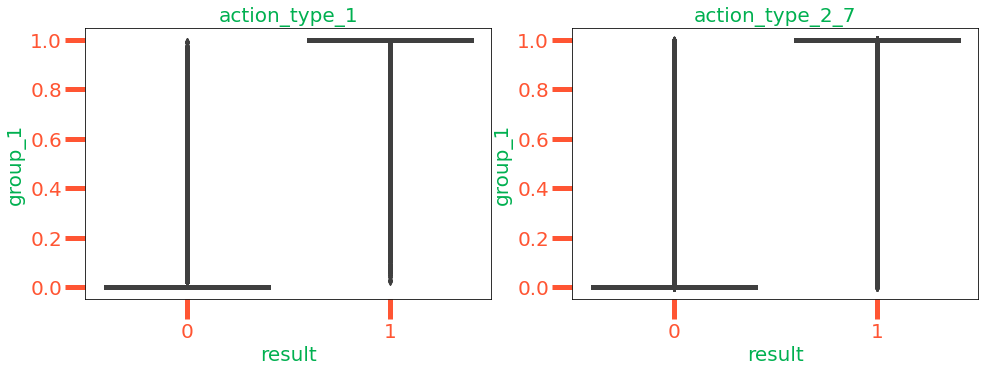

In [82]:
fig = plt.figure()

fig.set_size_inches(16, 5)

ax = fig.add_subplot(1, 2, 1)
group_1_train_1 = action_train_1[['group_1', 'result']]
mean_target = group_1_train_1.groupby('group_1')['result'].mean()
group_1_train_1['group_1'] = group_1_train_1['group_1'].map(mean_target)
sns.boxplot(y='group_1', x=group_1_train_1['result'].astype('category'), data=group_1_train_1)\
                                                    .set_title('action_type_1')

ax = fig.add_subplot(1, 2, 2)
group_1_train_2 = action_train_2[['group_1', 'result']]
mean_target = group_1_train_2.groupby('group_1')['result'].mean()
group_1_train_2['group_1'] = group_1_train_2['group_1'].map(mean_target)
sns.boxplot(y='group_1', x=group_1_train_2['result'].astype('category'), data=group_1_train_2)\
                                                    .set_title('action_type_2_7')

plt.show()

Судя по боксплоту зависимость таргетной переменной от категории 'group_1' на лицо, да, есть выбросы, но определенно есть много объектов принадлежащих некоторым категориям средний таргет которых 0 и также наличие категорий с большим кол-вом объектов средний таргет которых 1.

Аналогично проверим для других вещественных признаков.

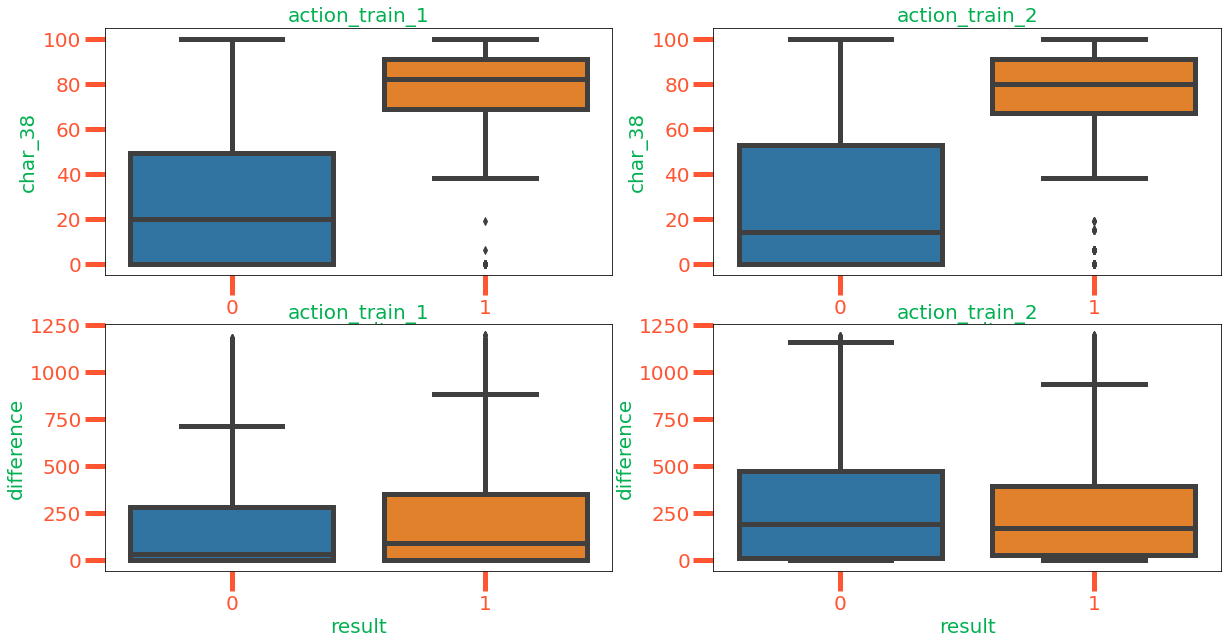

In [49]:
fig = plt.figure()

fig.set_size_inches(20, 10)

ax = fig.add_subplot(2, 2, 1)
sns.boxplot(y='char_38', x=action_train_1['result'].astype('category'), data=action_train_1)
plt.title('action_train_1')

ax = fig.add_subplot(2, 2, 2)
sns.boxplot(y='char_38', x=action_train_2['result'].astype('category'), data=action_train_2)
plt.title('action_train_2')

ax = fig.add_subplot(2, 2, 3)
sns.boxplot(y='difference', x=action_train_1['result'].astype('category'), data=action_train_1)
plt.title('action_train_1')

ax = fig.add_subplot(2, 2, 4)
sns.boxplot(y='difference', x=action_train_2['result'].astype('category'), data=action_train_2)
plt.title('action_train_2')

plt.show()

In [76]:
categorical_columns_1_for_gists = ['char_4_x', 'char_5_x', 'char_6_x', 'char_1_y', 'char_2_y', 
                                   'char_5_y', 'char_6_y', 'char_8_y', 'char_9_y', 'char_10_y', 
                                   'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 
                                   'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 
                                   'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 
                                   'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 
                                   'char_35', 'char_36', 'char_37', 'date_x_year', 'date_x_month', 
                                   'date_y_year', 'date_y_month']

In [77]:
categorical_columns_1_for_mte = ['char_1_x', 'char_2_x', 'char_7_x', 'char_8_x', 'char_9_x', 'char_3_y', 
                                 'char_7_y', 'char_4_y', 'date_x_day', 'date_y_day']

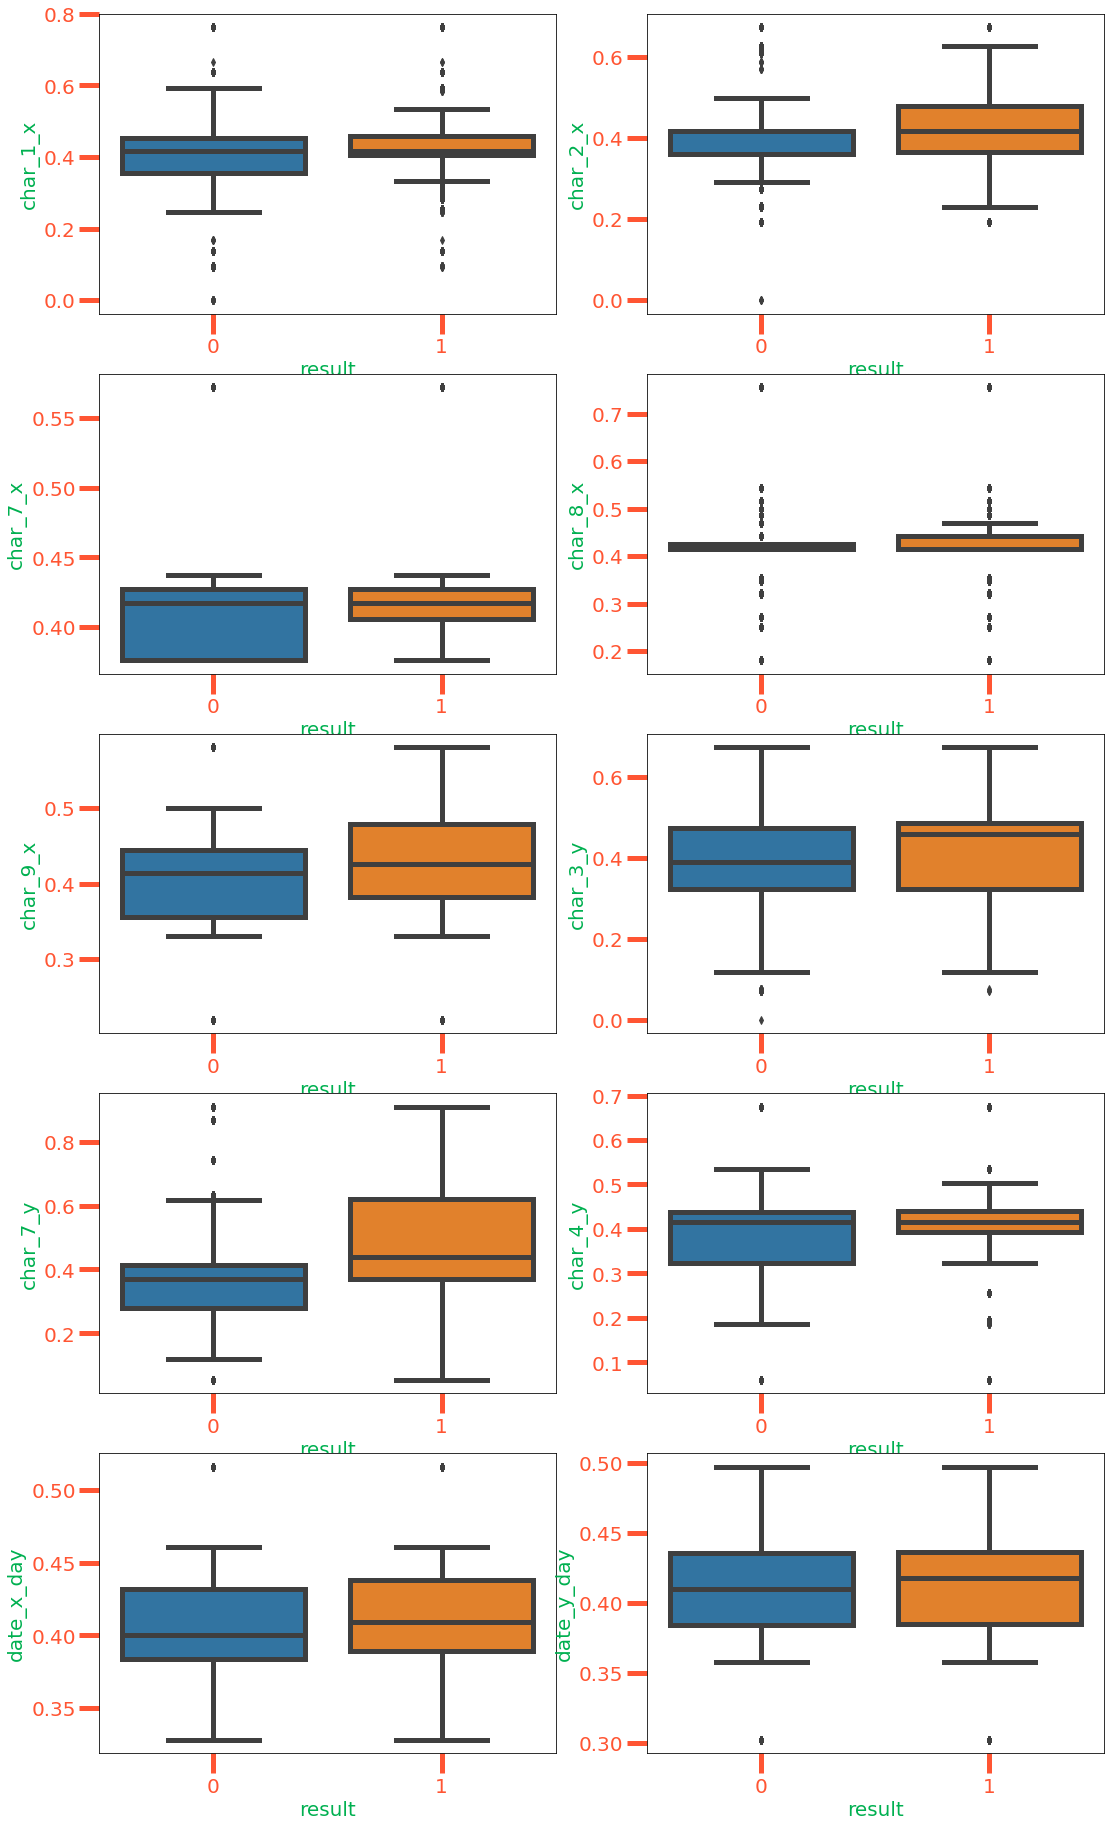

In [87]:
fig = plt.figure()

fig.set_size_inches(18, 32)

for i_th, actual_feature in enumerate(categorical_columns_1_for_mte):
    ax = fig.add_subplot(5, 2, i_th+1)

    feature_train_1 = action_train_1[[actual_feature, 'result']]
    mean_target = feature_train_1.groupby(actual_feature)['result'].mean()
    feature_train_1[actual_feature] = feature_train_1[actual_feature].map(mean_target)
    sns.boxplot(y=actual_feature, x=feature_train_1['result'].astype('category'), data=feature_train_1)

plt.show()

Остальные пожалуй можно попробовать визуализировать категориально.

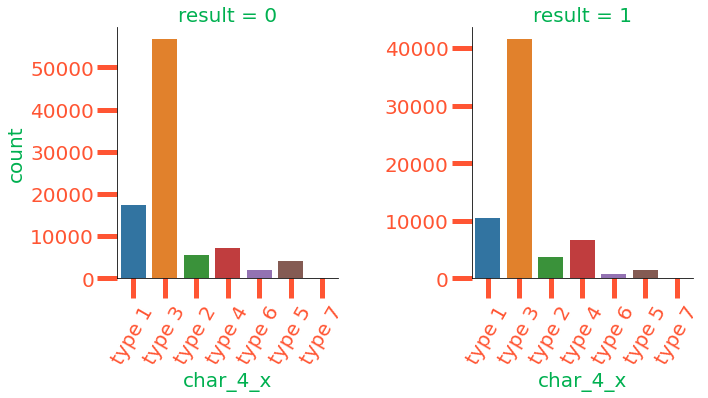

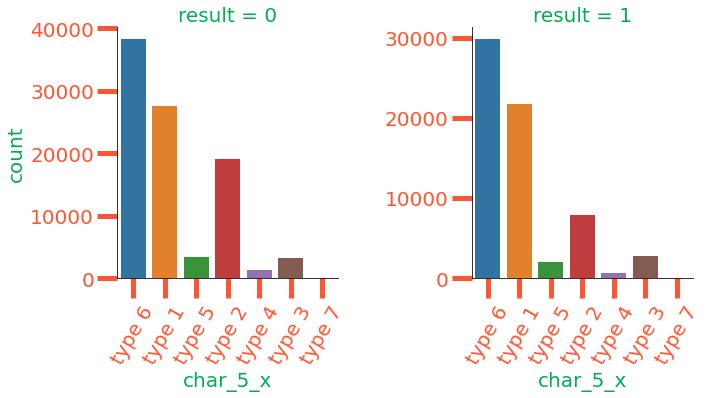

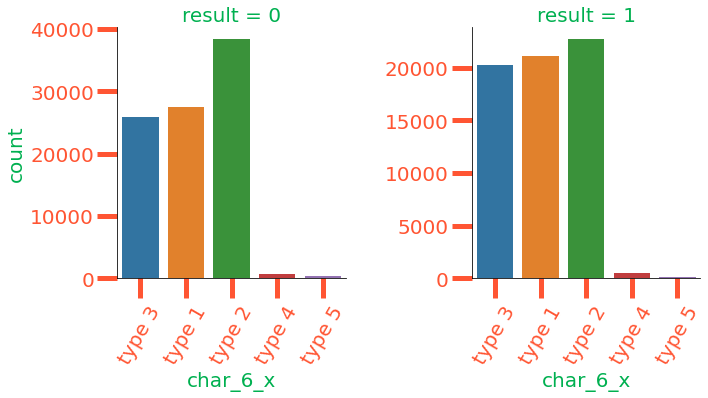

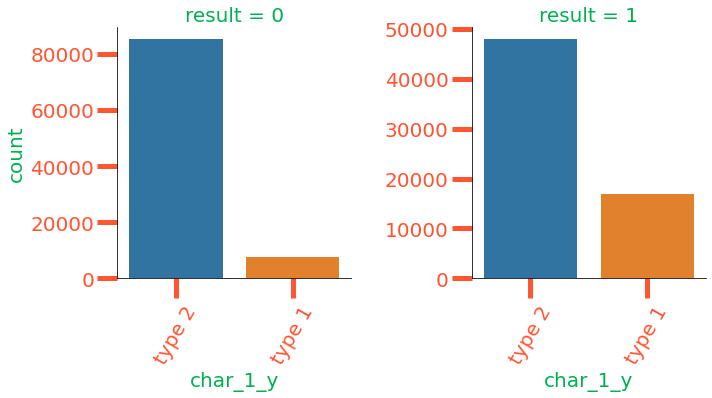

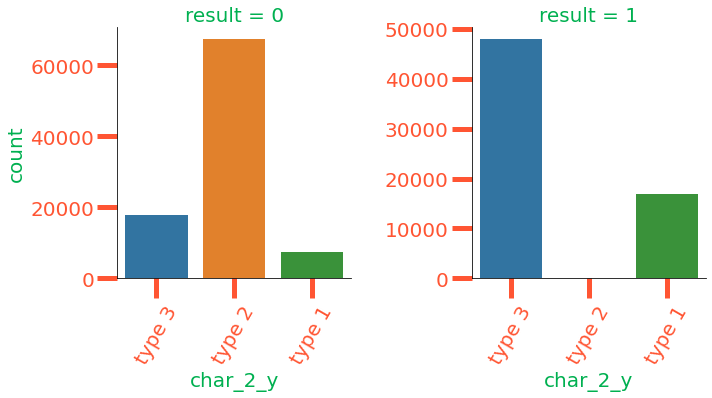

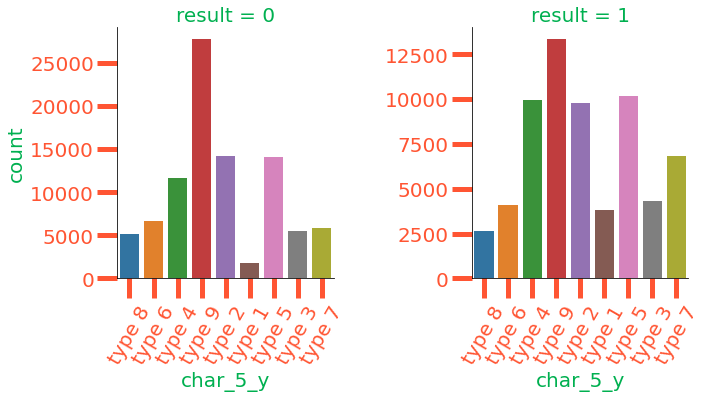

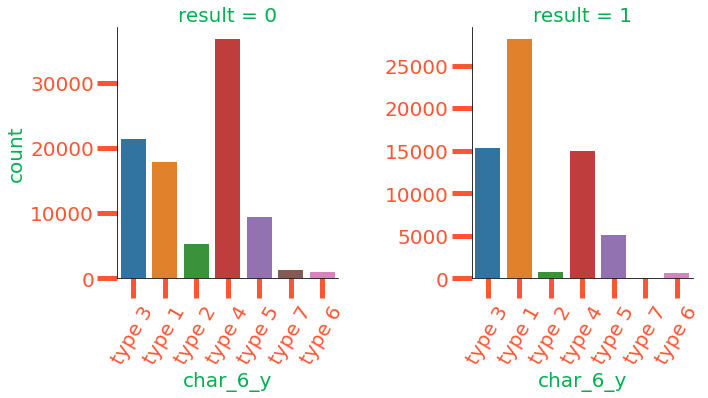

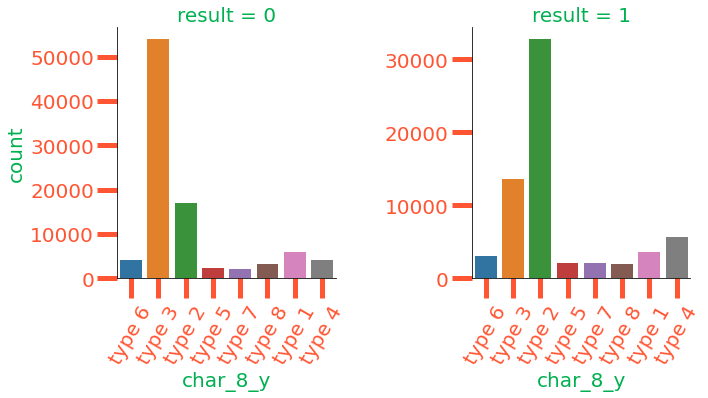

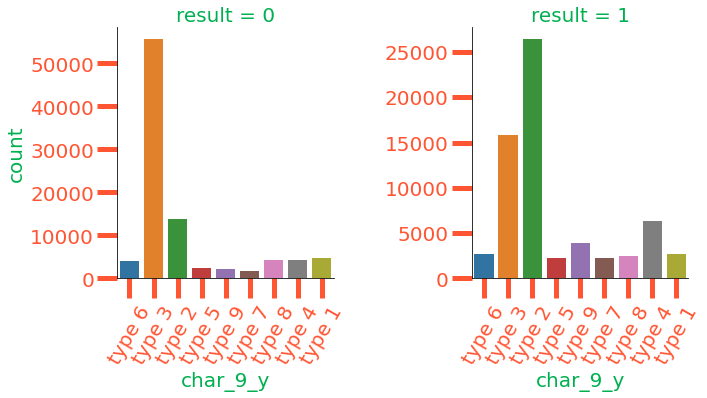

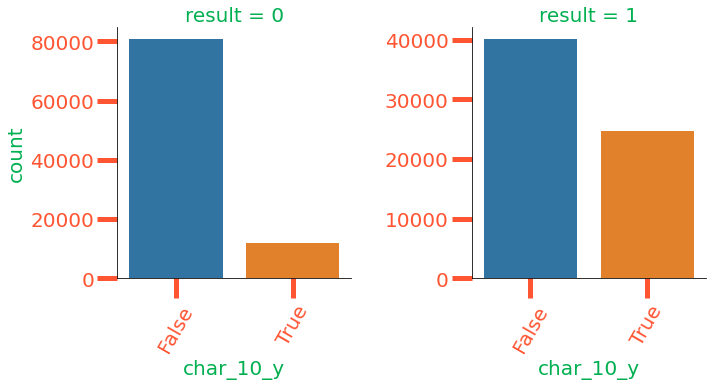

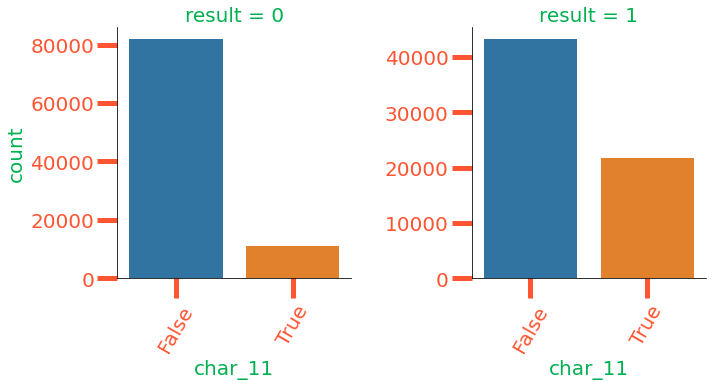

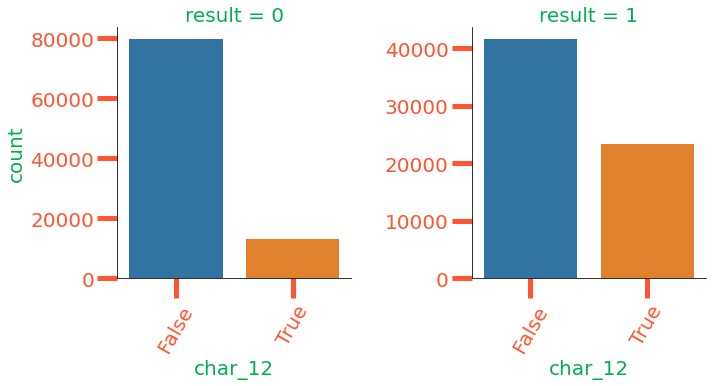

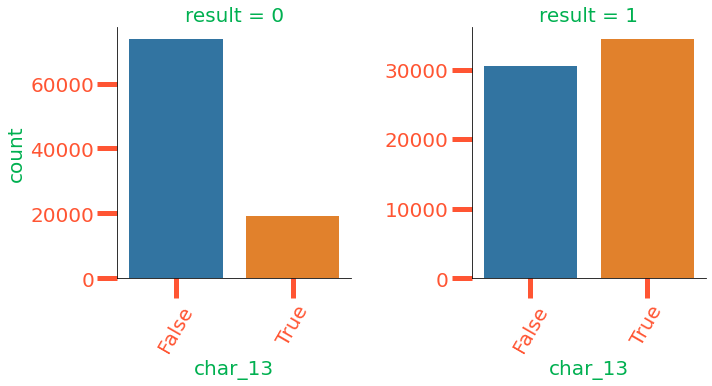

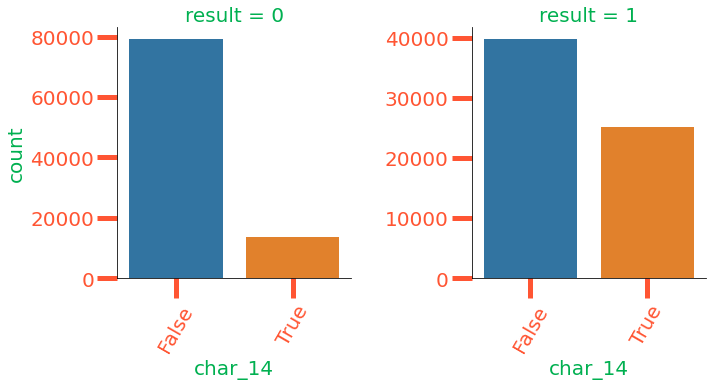

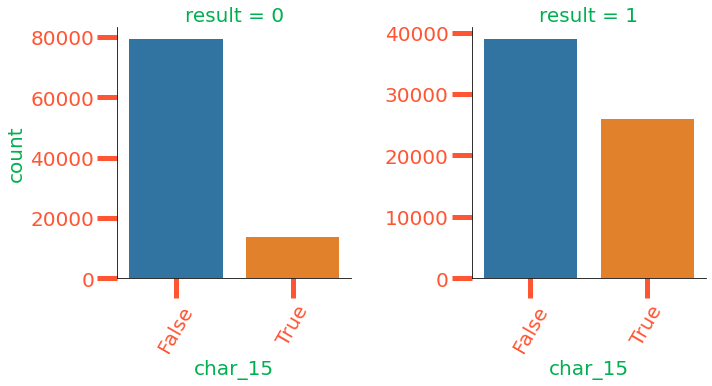

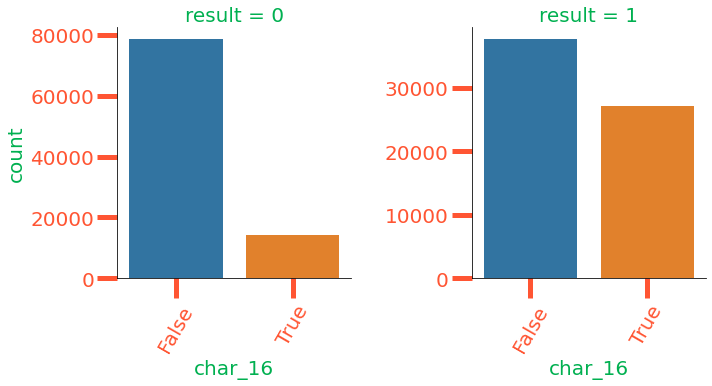

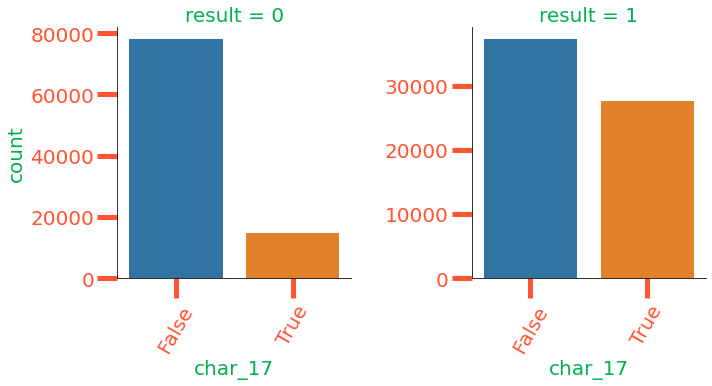

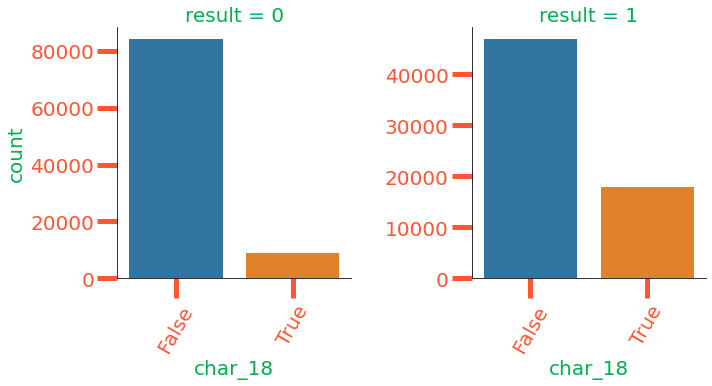

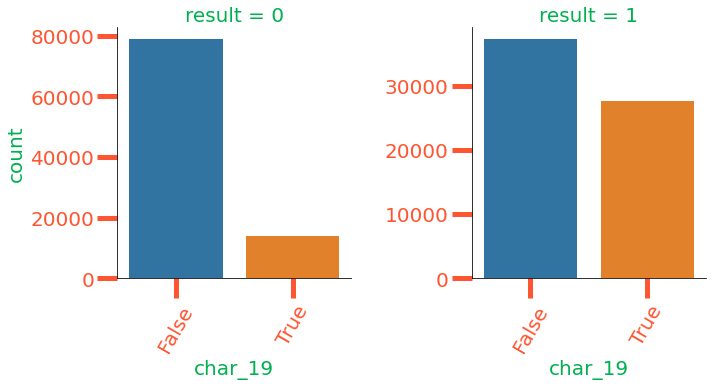

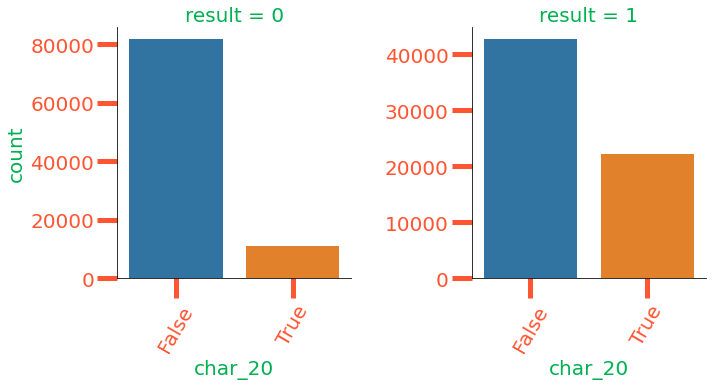

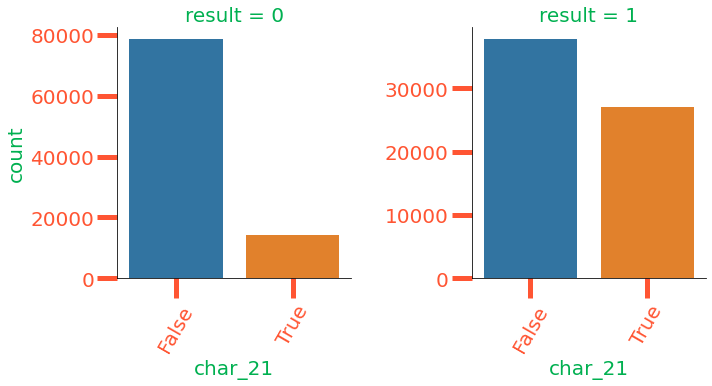

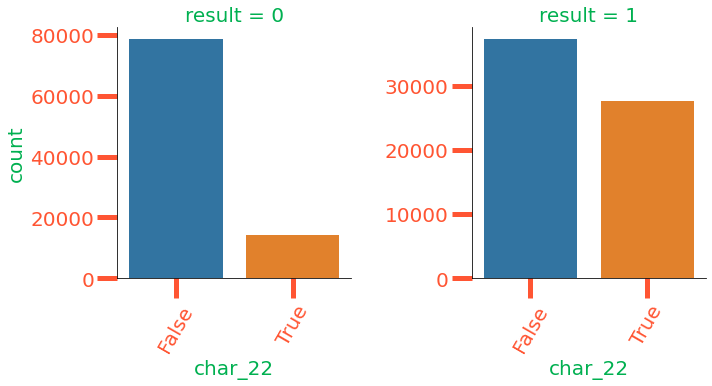

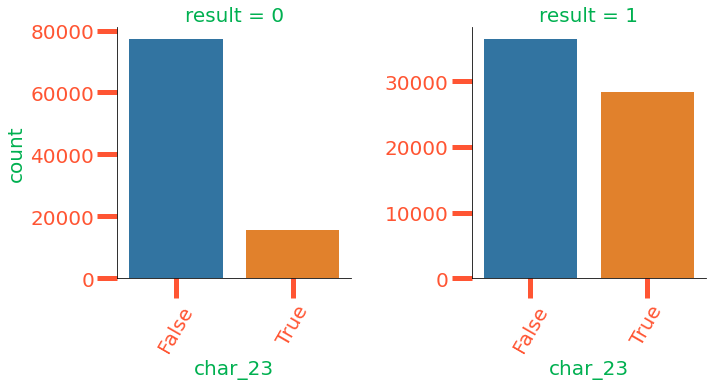

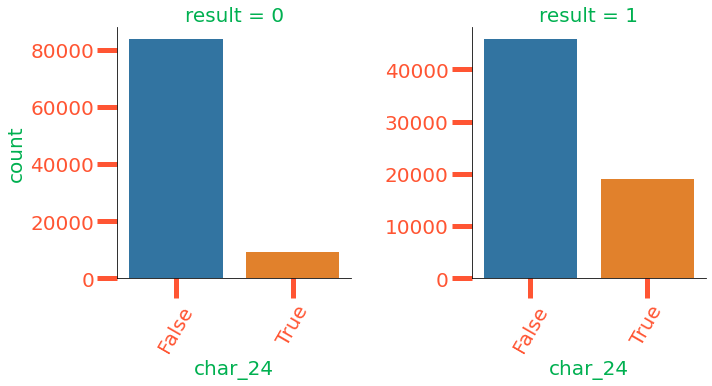

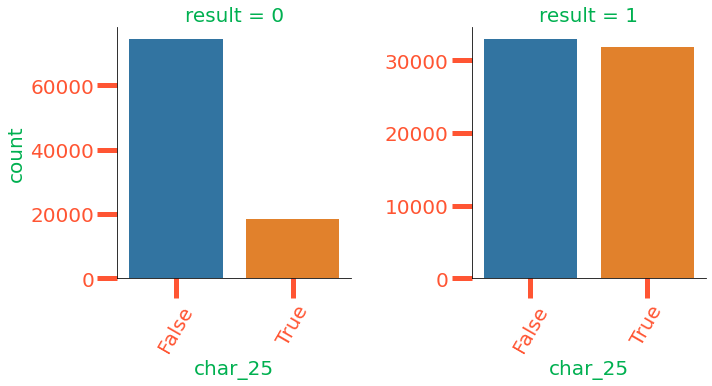

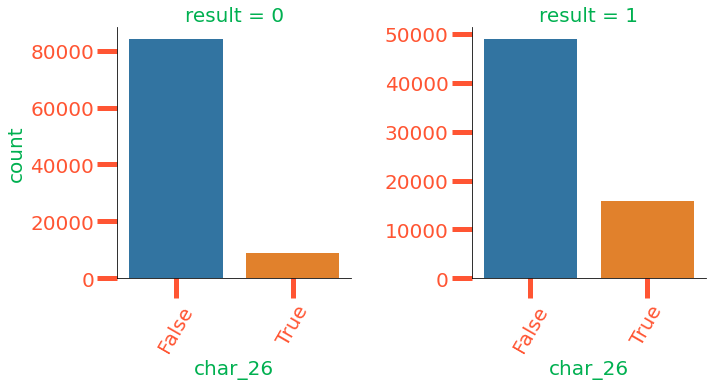

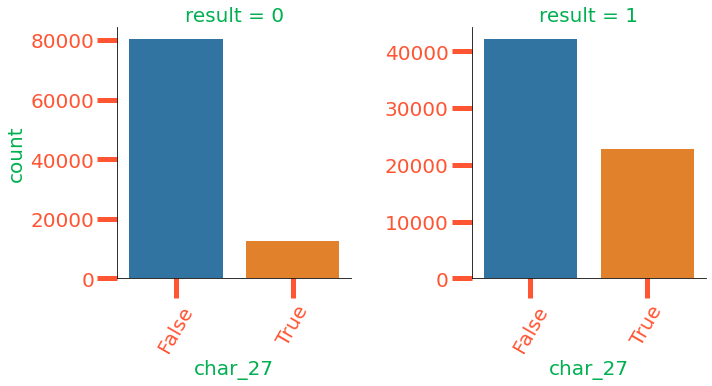

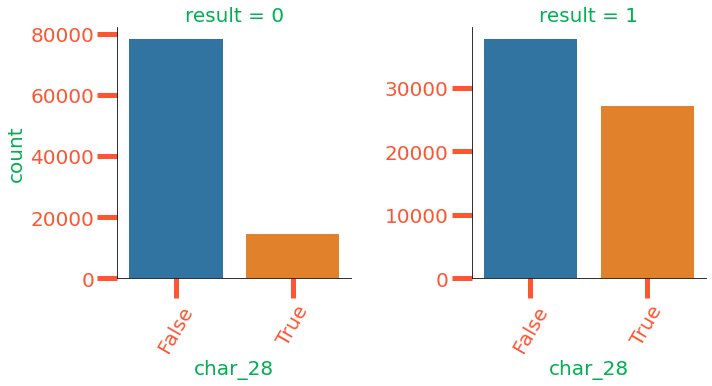

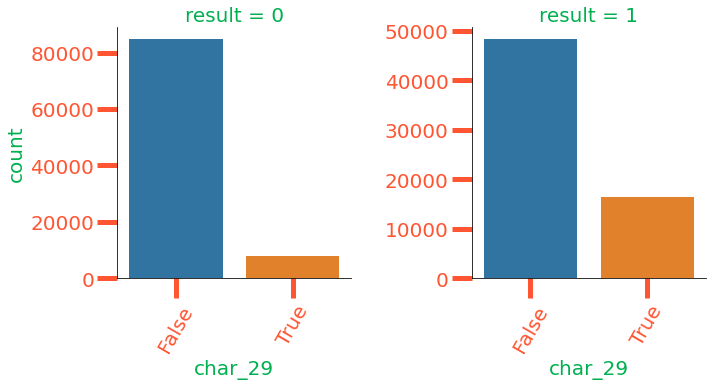

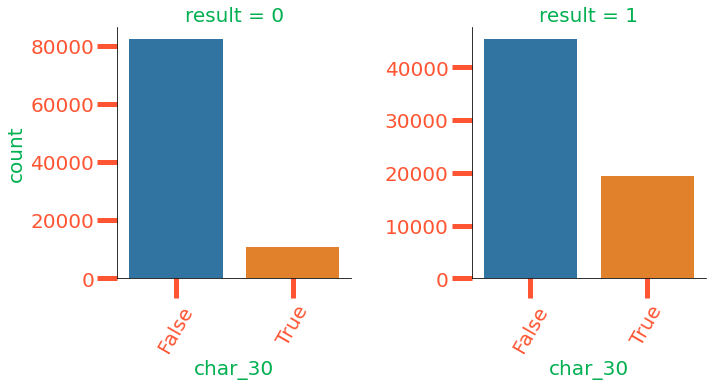

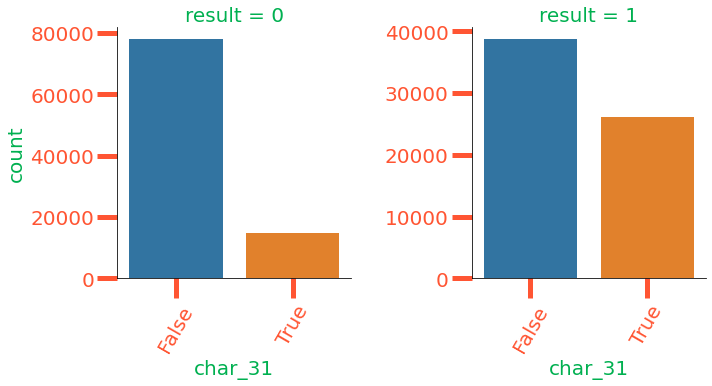

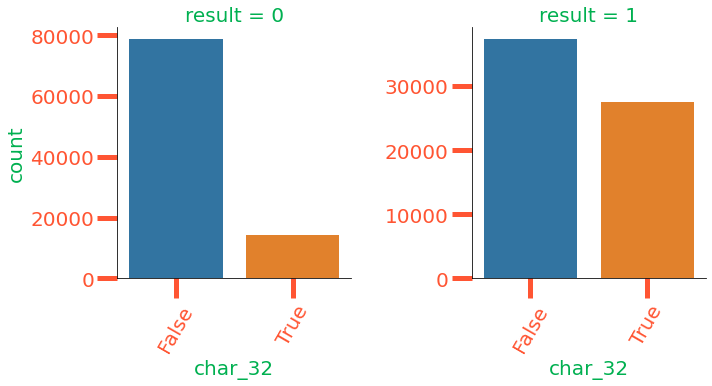

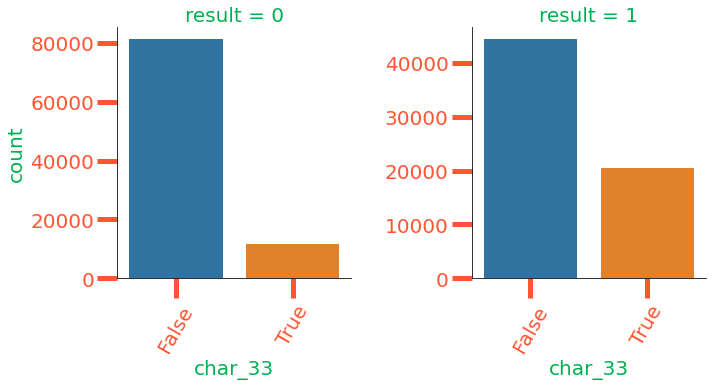

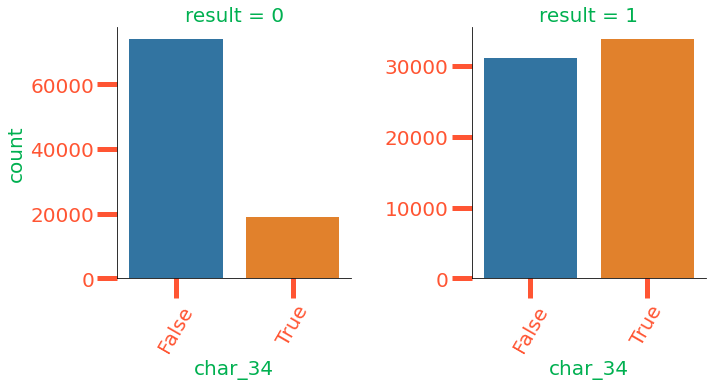

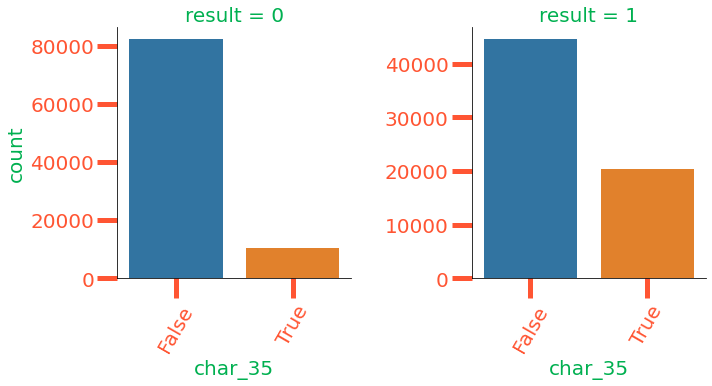

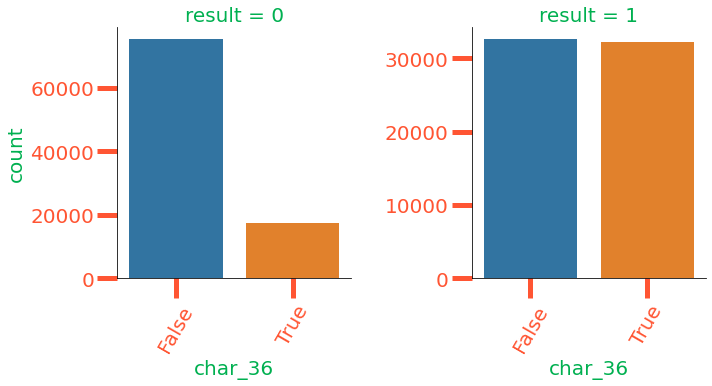

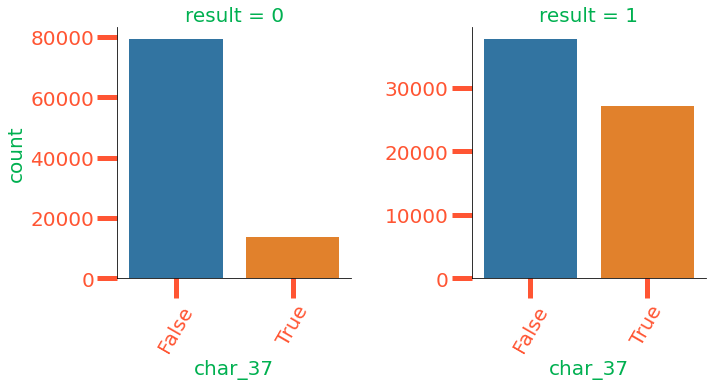

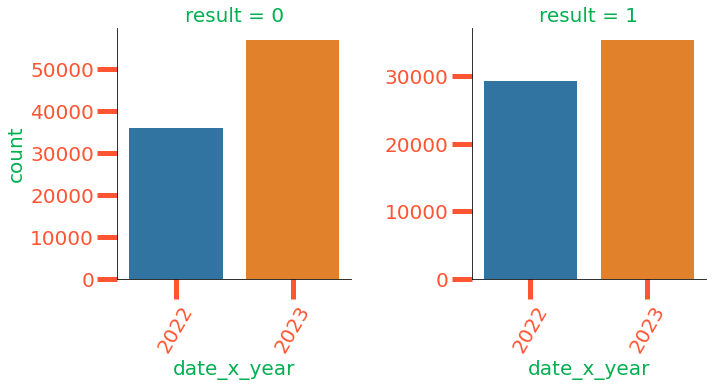

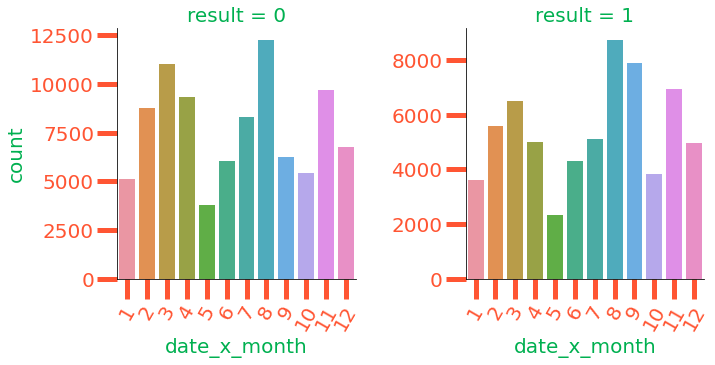

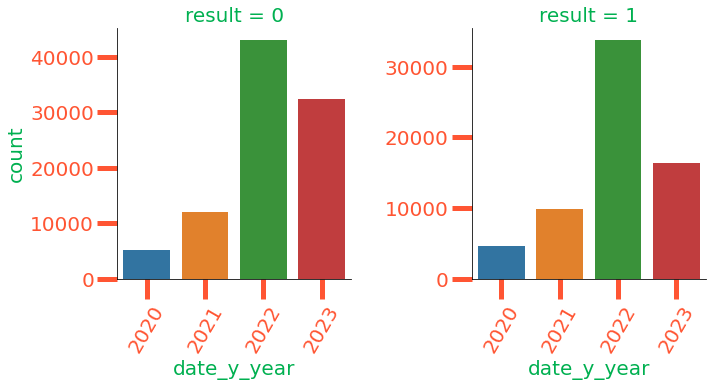

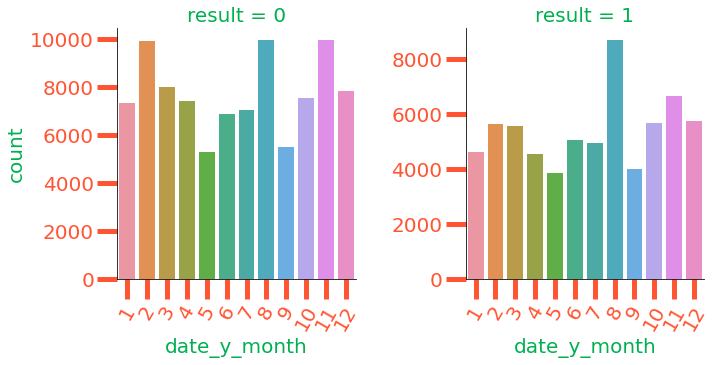

In [80]:
### Гистограммы распределений в разных классах

for col in categorical_columns_1_for_gists:
    g = sns.catplot(x=col, kind='count', col='result', data=action_train_1, sharey=False)
    g.set_xticklabels(rotation=60)

Учитывая небольшой дисбаланс классов и судя по гистограммам распределений в разных классах я бы удалил только признак 'char_8_x'. Но в целом можно и оставить. Распределения между таргетами все-такие несколько отличаются.

Проанализируем признаки датасета с действиями типа 1

In [81]:
action_train_2.nunique()

action_type         6
char_10_x        6515
result              2
char_1_y            2
group_1         28431
char_2_y            3
char_3_y           43
char_4_y           25
char_5_y            9
char_6_y            7
char_7_y           25
char_8_y            8
char_9_y            9
char_10_y           2
char_11             2
char_12             2
char_13             2
char_14             2
char_15             2
char_16             2
char_17             2
char_18             2
char_19             2
char_20             2
char_21             2
char_22             2
char_23             2
char_24             2
char_25             2
char_26             2
char_27             2
char_28             2
char_29             2
char_30             2
char_31             2
char_32             2
char_33             2
char_34             2
char_35             2
char_36             2
char_37             2
char_38           101
date_x_year         2
date_x_month       12
date_x_day         31
date_y_yea

Как мы уже выяснили зависимость таргетной переменной от признака 'group_1' явно присутствует, оценим зависимость от признака 'char_10_x' в котором также достаточно много уникальных категорий:

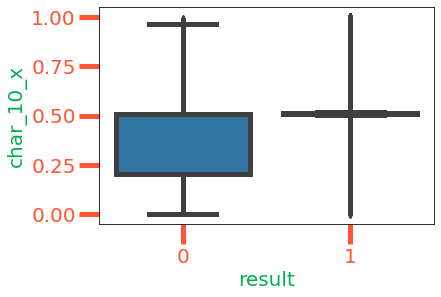

In [37]:
char_10_x_train_2 = action_train_2[['char_10_x', 'result']]
mean_target = char_10_x_train_2.groupby('char_10_x')['result'].mean()
char_10_x_train_2['char_10_x'] = char_10_x_train_2['char_10_x'].map(mean_target)

sns.boxplot(y='char_10_x', x=char_10_x_train_2['result'].astype('category'), data=char_10_x_train_2)
plt.show()

In [88]:
categorical_columns_2_for_gists = ['action_type', 'char_1_y', 'char_2_y', 'char_5_y', 'char_6_y', 
                                   'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12', 
                                   'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 
                                   'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 
                                   'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 
                                   'char_28', 'char_29', 'char_30', 'char_31', 'char_32',
                                   'char_33', 'char_34', 'char_35', 'char_36', 'char_37',
                                   'date_x_year', 'date_x_month', 'date_y_year', 'date_y_month']

In [84]:
categorical_columns_2_for_mte = ['char_3_y', 'char_4_y', 'char_7_y', 'date_x_day', 'date_y_day']

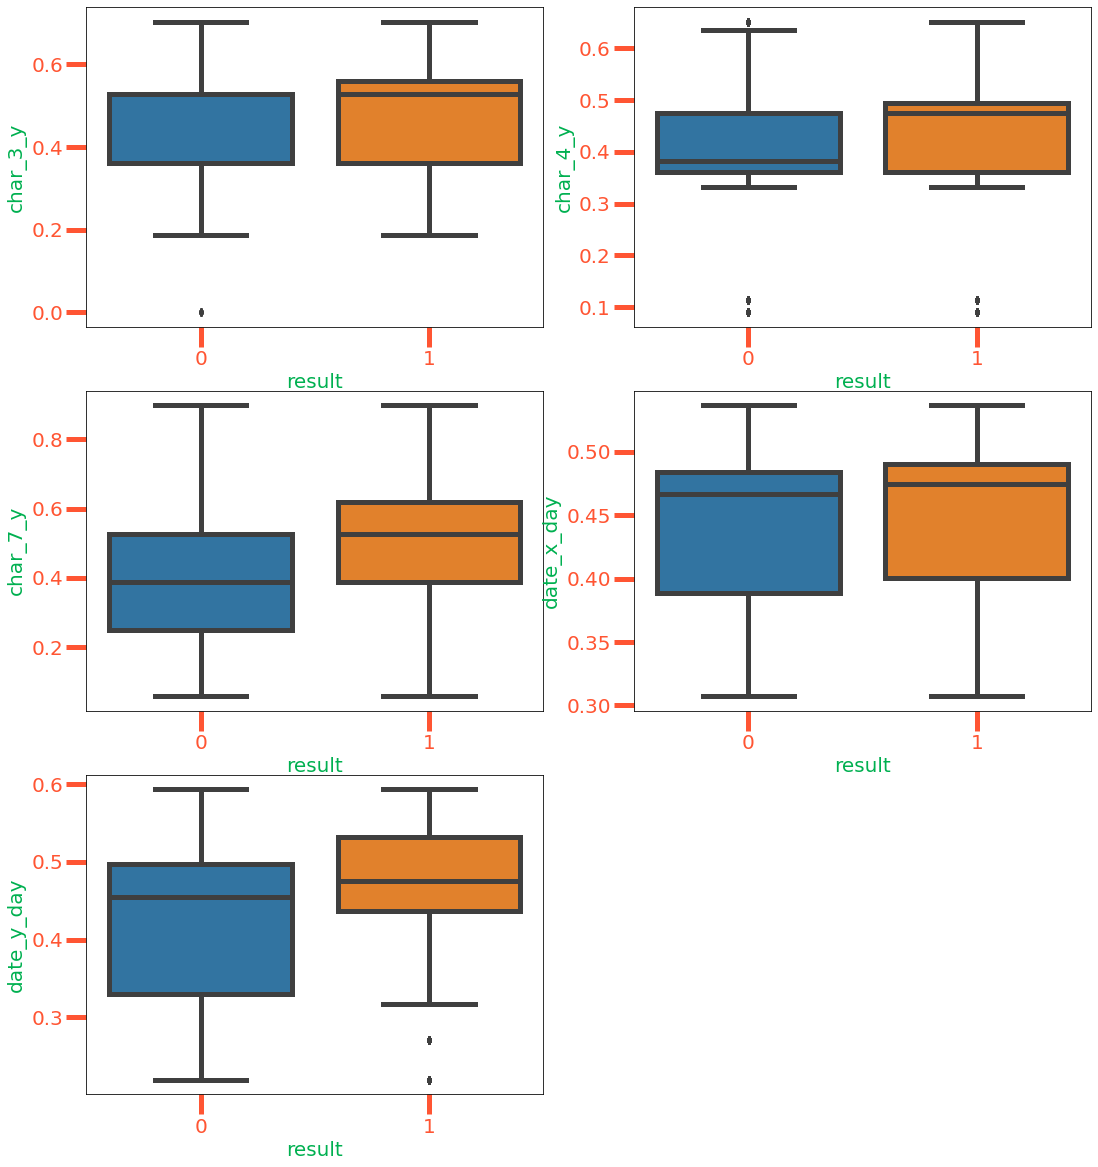

In [85]:
fig = plt.figure()

fig.set_size_inches(18, 20)

for i_th, actual_feature in enumerate(categorical_columns_2_for_mte):
    ax = fig.add_subplot(3, 2, i_th+1)

    feature_train_2 = action_train_2[[actual_feature, 'result']]
    mean_target = feature_train_2.groupby(actual_feature)['result'].mean()
    feature_train_2[actual_feature] = feature_train_2[actual_feature].map(mean_target)
    sns.boxplot(y=actual_feature, x=feature_train_2['result'].astype('category'), data=feature_train_2)

plt.show()

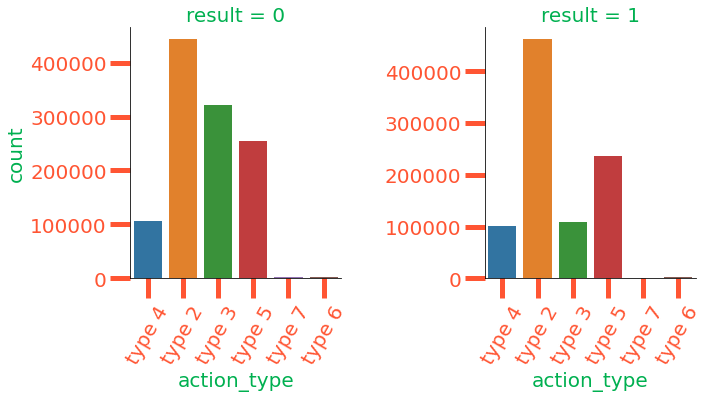

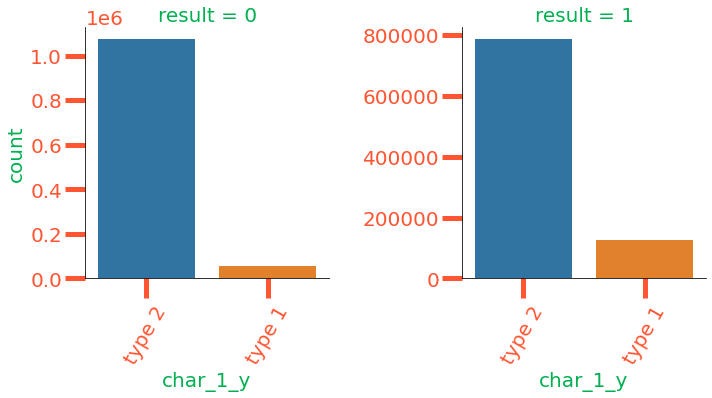

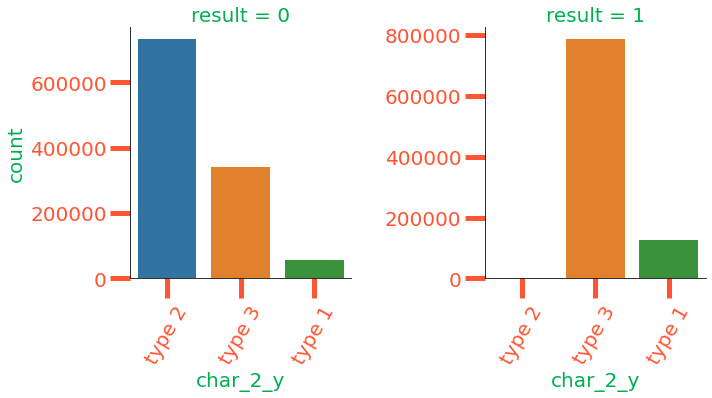

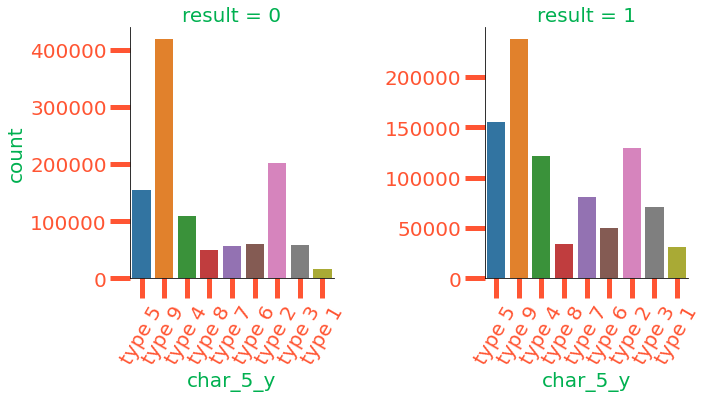

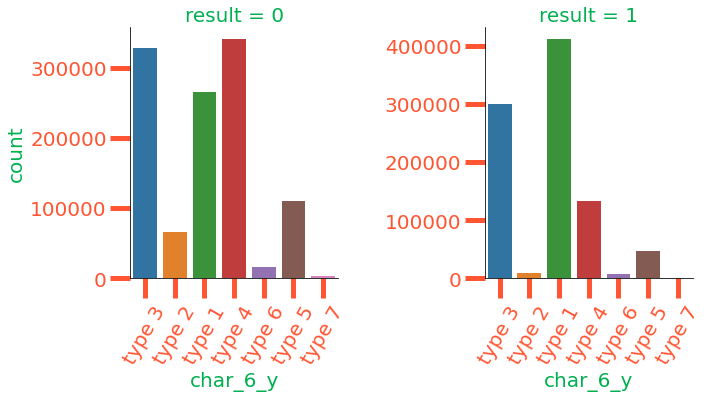

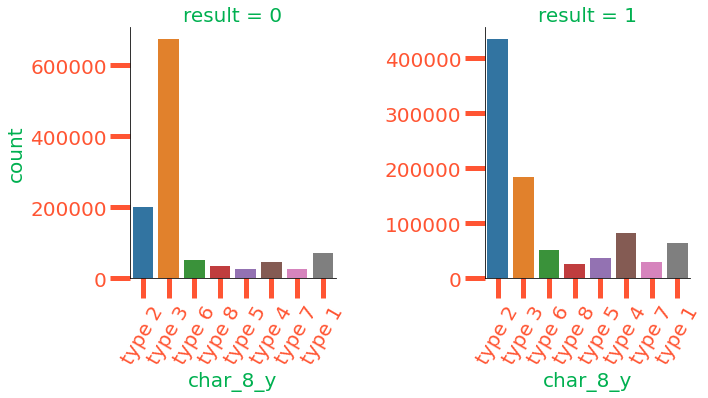

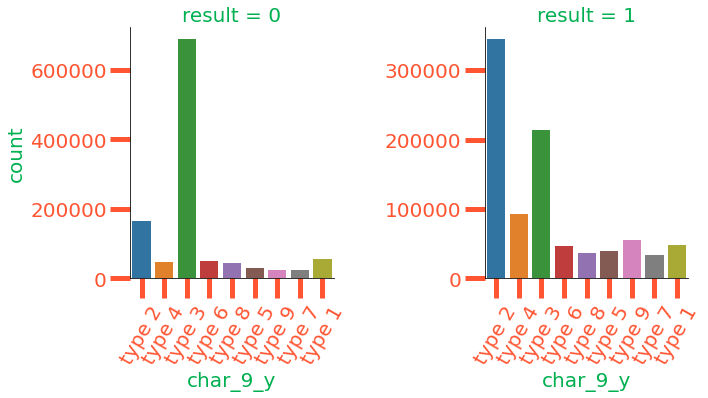

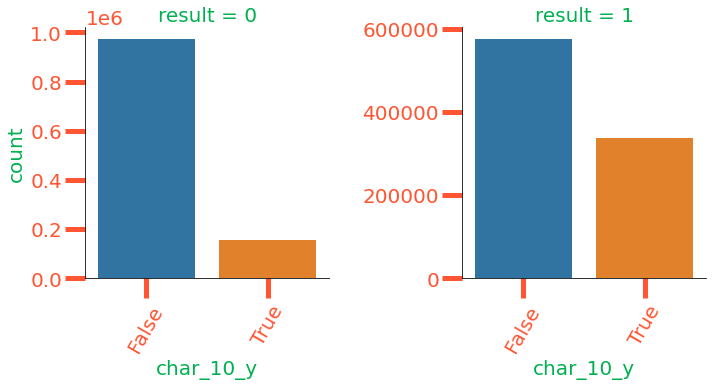

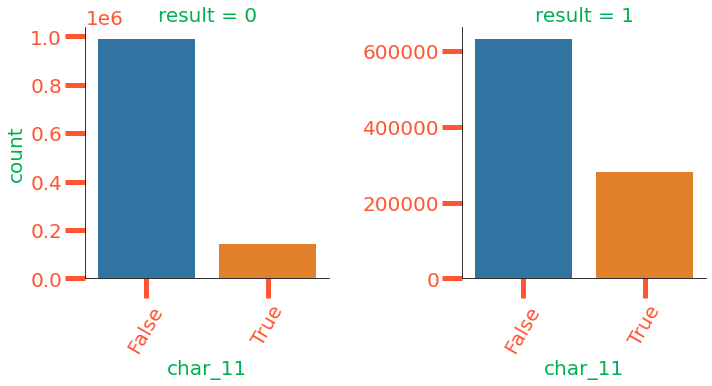

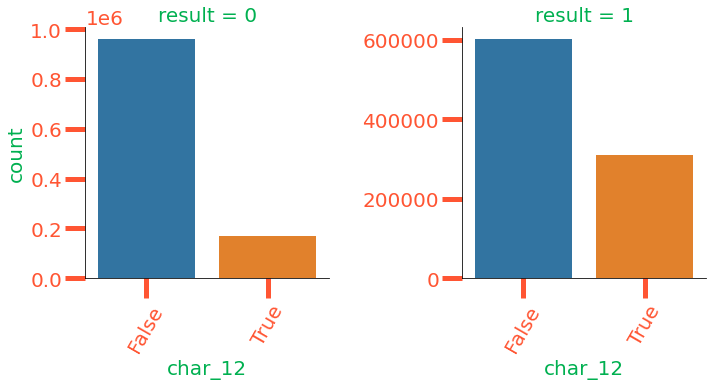

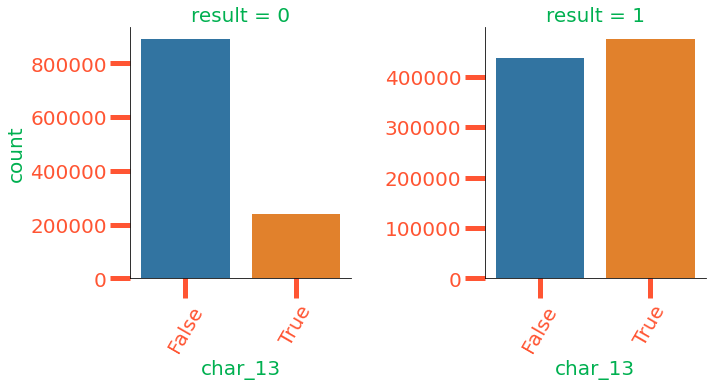

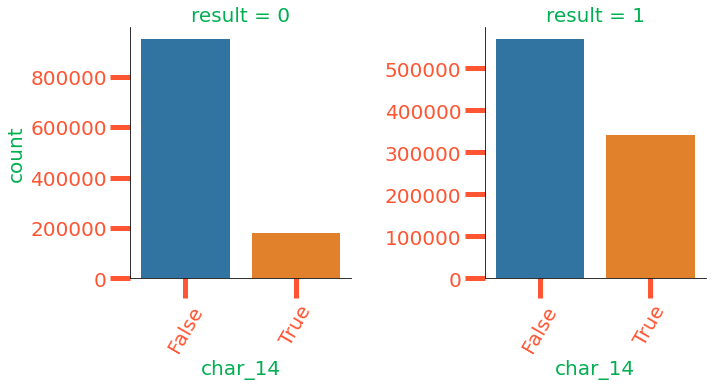

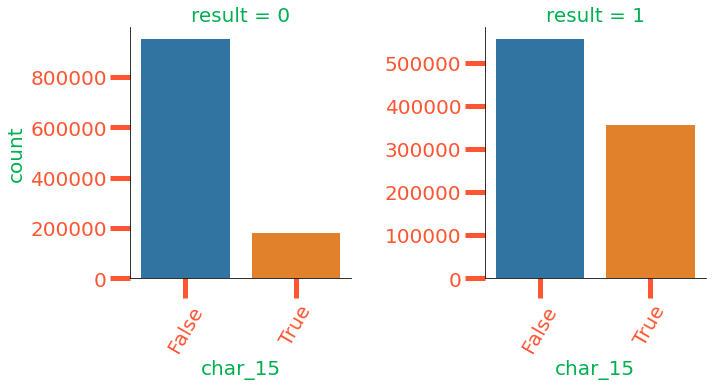

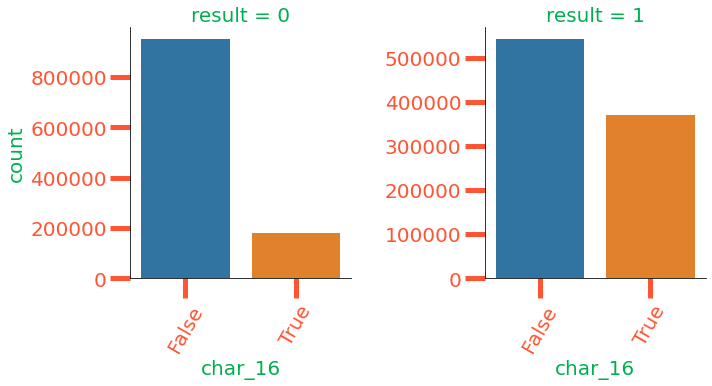

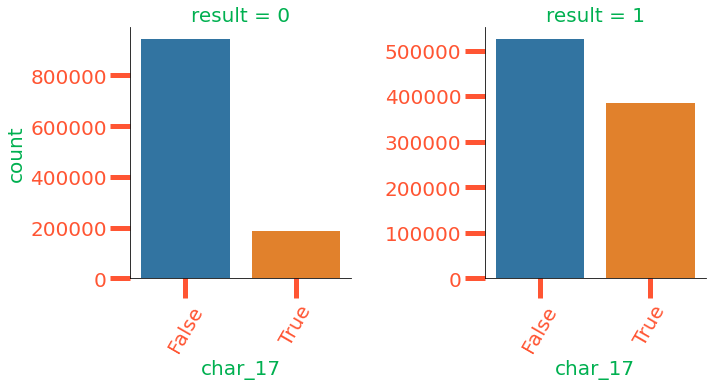

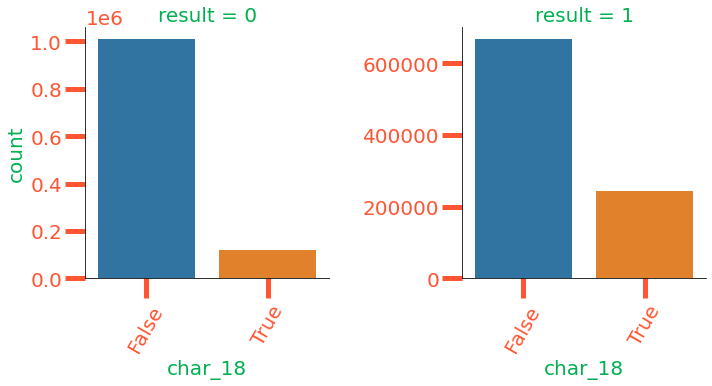

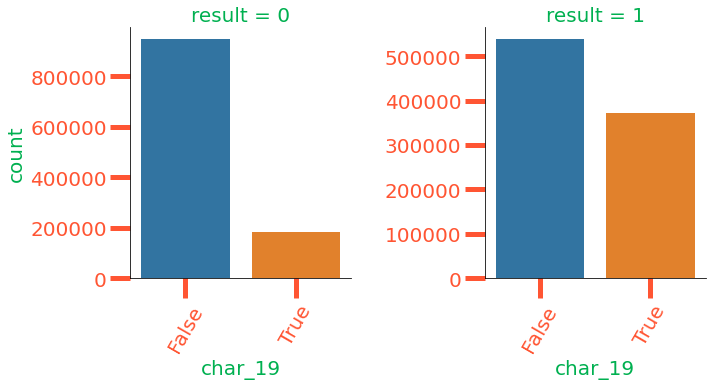

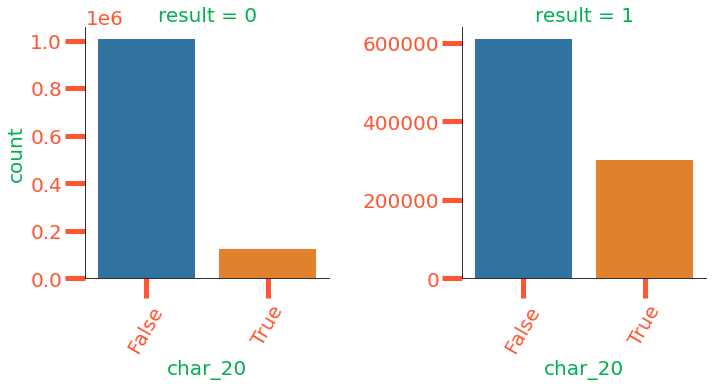

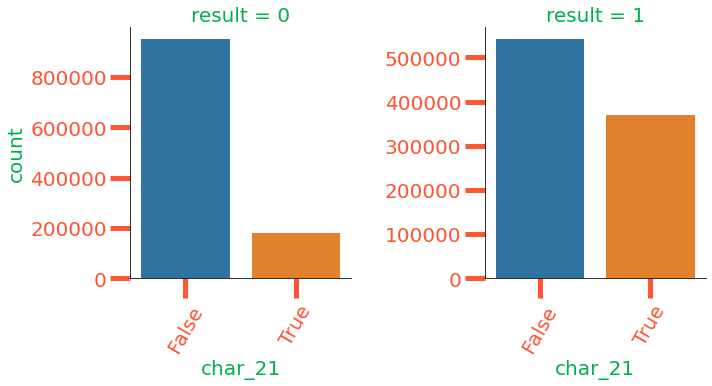

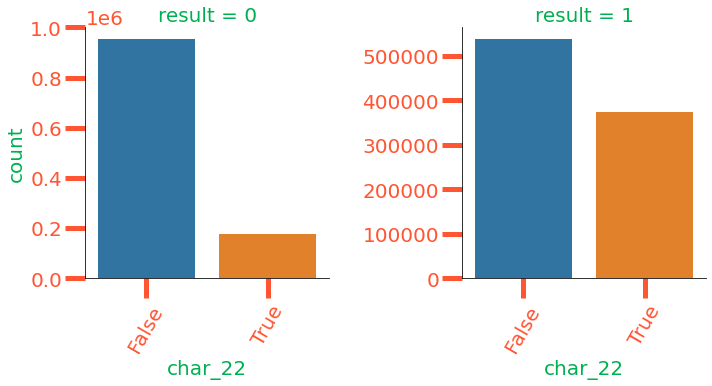

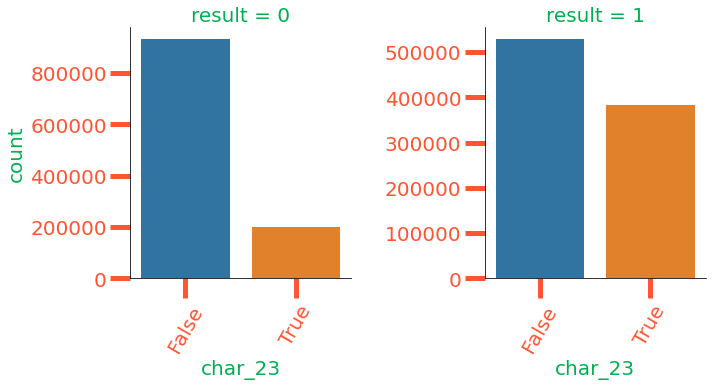

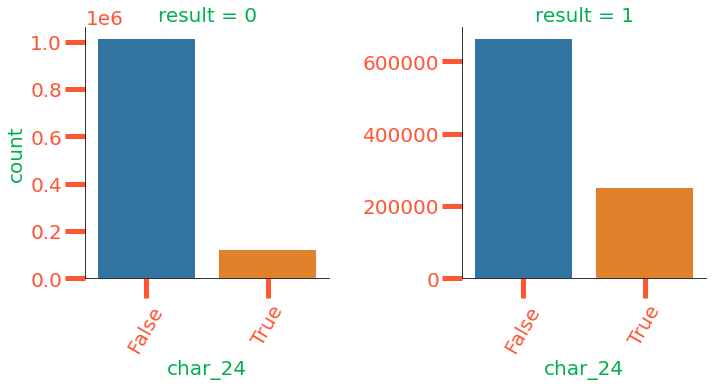

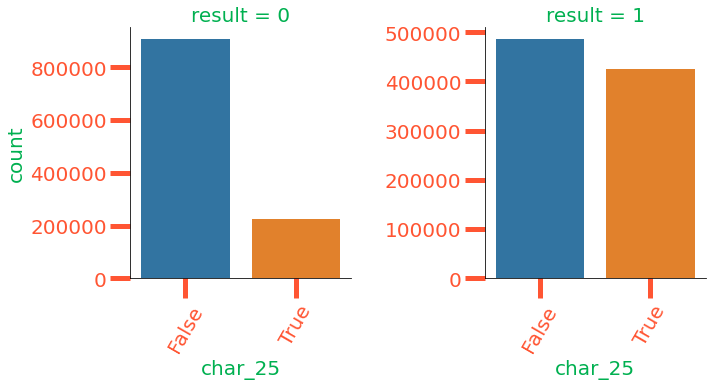

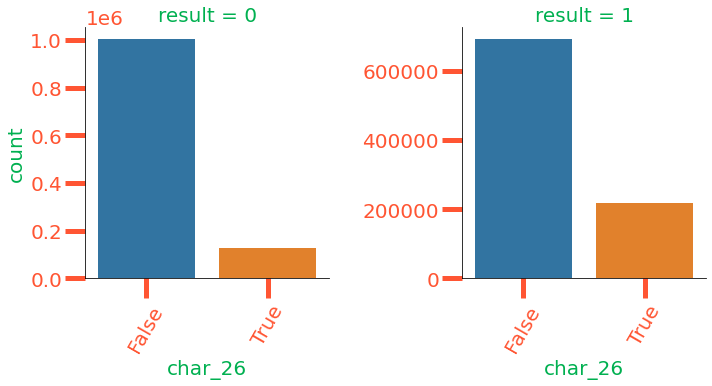

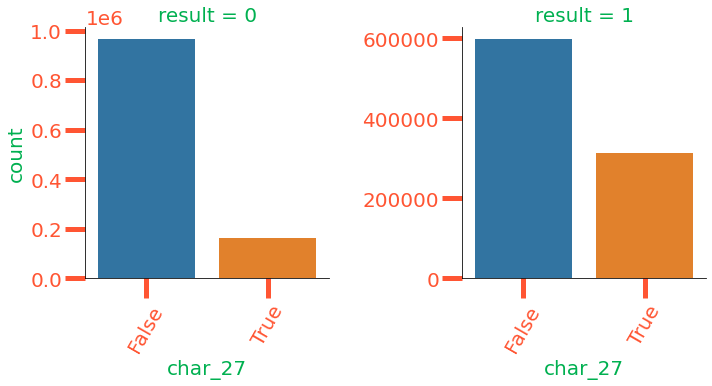

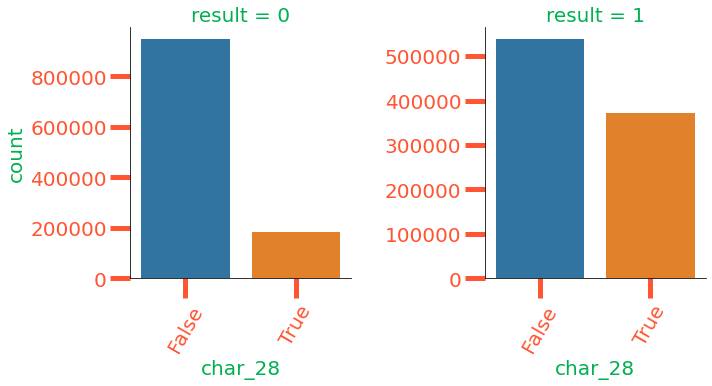

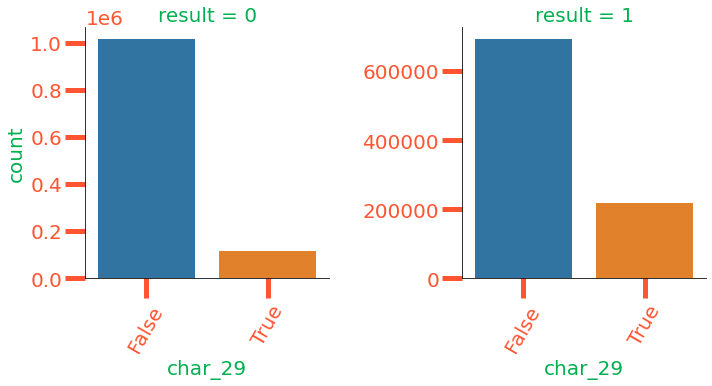

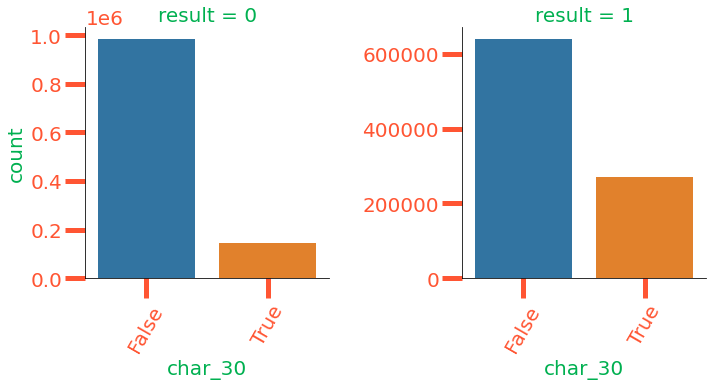

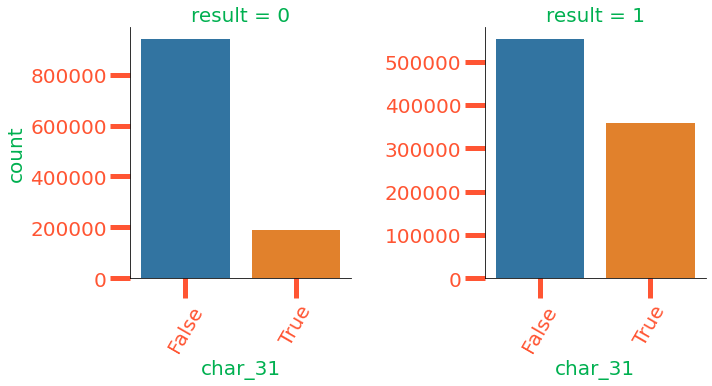

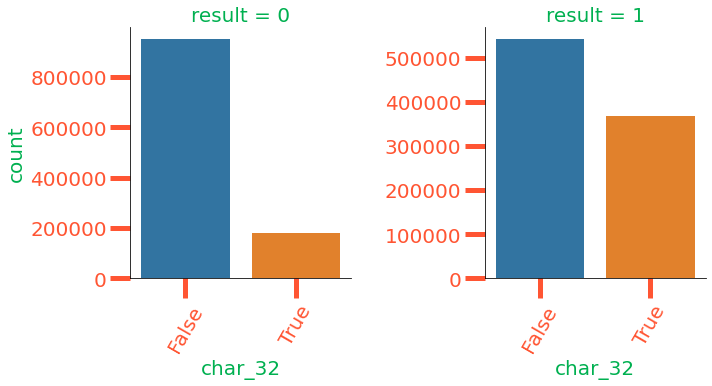

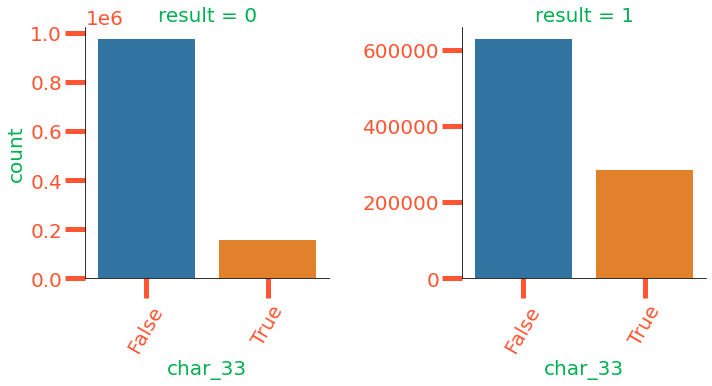

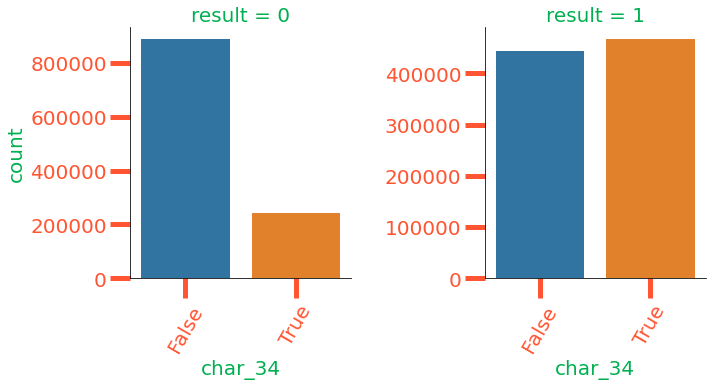

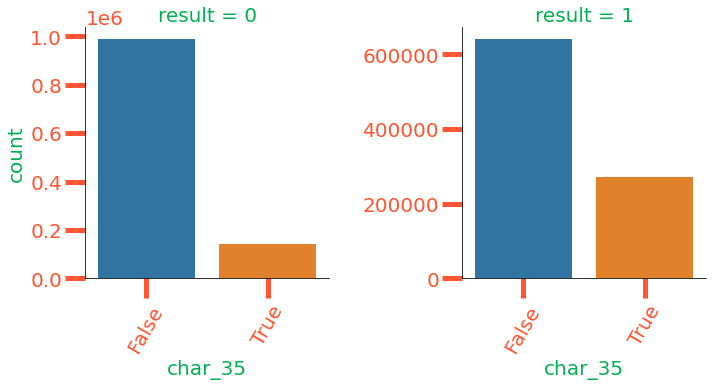

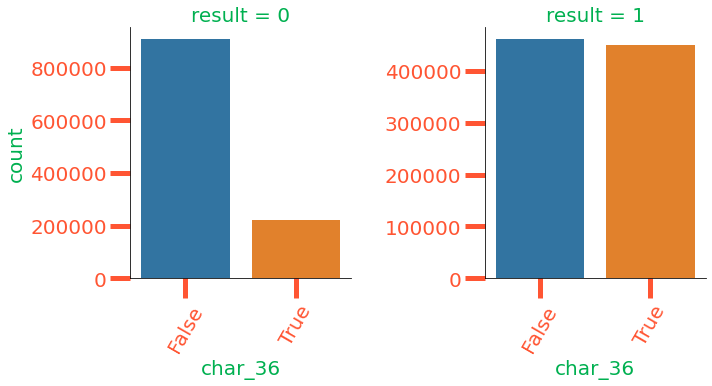

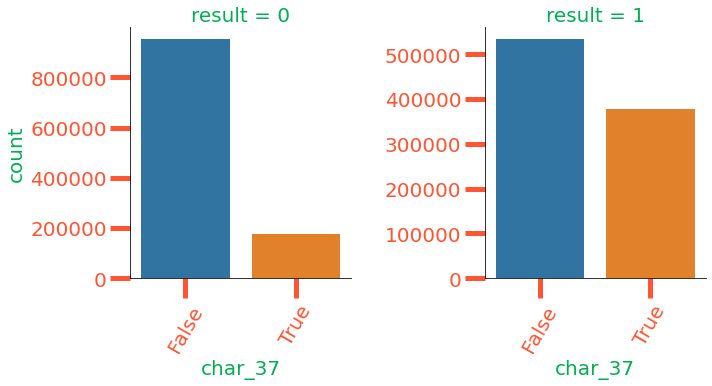

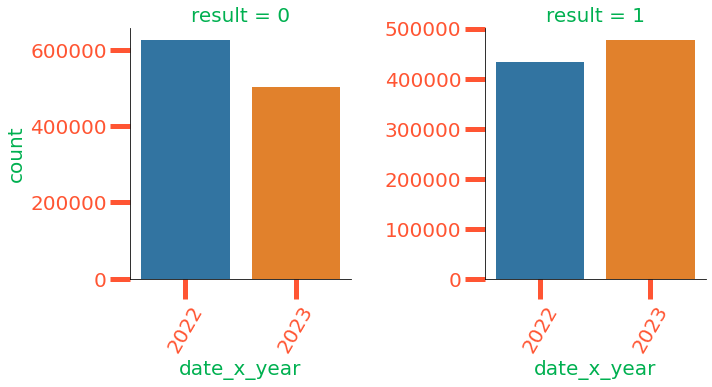

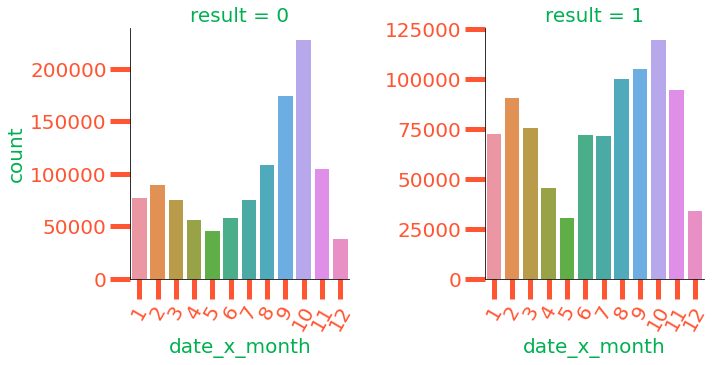

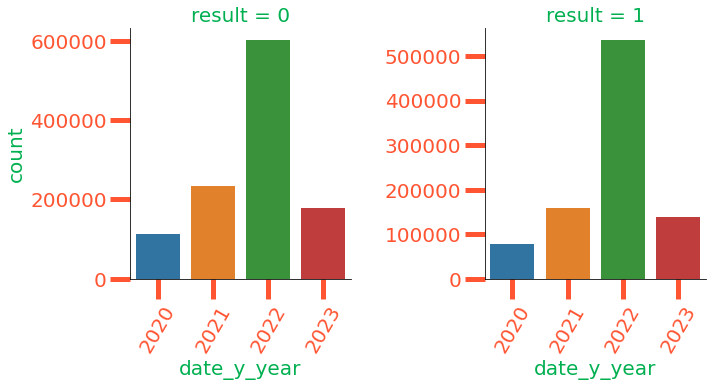

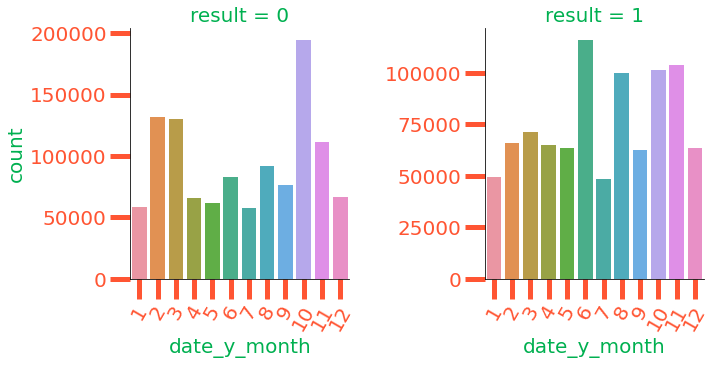

In [90]:
### Гистограммы распределений в разных классах

for col in categorical_columns_2_for_gists:
    g = sns.catplot(x=col, kind='count', col='result', data=action_train_2, sharey=False)
    g.set_xticklabels(rotation=60)

Оставим все признаки данного датасета. Судя по гистограммам некоторые категории оказывают некоторое влияние на таргетную переменную.

### Предобработка данных

Необходимо понимать будут ли нам приходить данные с неизвестными нам ранее категориями

In [91]:
action_train_for_check = pd.read_csv("data/action_train.csv", index_col=0)
action_train_for_check = action_train_for_check.merge(person, how='left', on='person_id')
action_train_for_check = action_train_for_check.drop(['result'], axis = 1)
action_test_for_check = pd.read_csv("data/action_test.csv", index_col=0)
action_test_for_check = action_test_for_check.merge(person, how='left', on='person_id')

columns_for_check = ['person_id', 'action_id', 'date_x', 'action_type', 'char_1_x',
       'char_2_x', 'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x', 'char_7_x',
       'char_8_x', 'char_9_x', 'char_10_x', 'char_1_y', 'group_1', 'char_2_y',
       'date_y', 'char_3_y', 'char_4_y', 'char_5_y', 'char_6_y', 'char_7_y',
       'char_8_y', 'char_9_y', 'char_10_y', 'char_11', 'char_12', 'char_13',
       'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19',
       'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25',
       'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31',
       'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37',
       'char_38']

for col in columns_for_check:
    print(col, set(action_test_for_check[col].values).issubset(set(action_train_for_check[col].values)))

person_id False
action_id False
date_x True
action_type True
char_1_x True
char_2_x True
char_3_x True
char_4_x True
char_5_x True
char_6_x True
char_7_x True
char_8_x True
char_9_x True
char_10_x False
char_1_y True
group_1 False
char_2_y True
date_y True
char_3_y True
char_4_y True
char_5_y True
char_6_y True
char_7_y True
char_8_y True
char_9_y True
char_10_y True
char_11 True
char_12 True
char_13 True
char_14 True
char_15 True
char_16 True
char_17 True
char_18 True
char_19 True
char_20 True
char_21 True
char_22 True
char_23 True
char_24 True
char_25 True
char_26 True
char_27 True
char_28 True
char_29 True
char_30 True
char_31 True
char_32 True
char_33 True
char_34 True
char_35 True
char_36 True
char_37 True
char_38 True


Действительно в тестовых данных в признаках 'char_10_x' и 'group_1' присутствуют категории которых нет в трейне, возникает вопрос какими значениями заполнять данные признаки при Mean Target Encoding. Как мы видели ранее данные признаки имеют достаточно четкое разделение по таргету и заполняя неизвестную категорию средним по самой встречающейся категории мы можем неверно предопределять предсказание в случае если данный признак имеет большой вес. Пока воспользуемся TargetEncoder, но если качество будет плохое возможно потребуется написать кастомный трансформер и заполнять неизвестные категории иначе.

Разделим тренировочные данные на трейн и тест для валидации обобщающей способности моделей.

In [97]:
from sklearn.model_selection import train_test_split


df_train_1, df_test_1 = train_test_split(
    action_train_1,
    test_size=0.2,
    random_state=33,
    stratify=action_train_1['result']
)

X_train_1, y_train_1 = df_train_1.drop(['result'], axis = 1), df_train_1['result']
X_train_1 = X_train_1.astype(object)
X_test_1, y_test_1 = df_test_1.drop(['result'], axis = 1), df_test_1['result']
X_test_1 = X_test_1.astype(object)

df_train_2, df_test_2 = train_test_split(
    action_train_2,
    test_size=0.2,
    stratify=action_train_2['result']
)

X_train_2, y_train_2 = df_train_2.drop(['result'], axis = 1), df_train_2['result']
X_train_2 = X_train_2.astype(object)
X_test_2, y_test_2 = df_test_2.drop(['result'], axis = 1), df_test_2['result']
X_test_2 = X_test_2.astype(object)

In [98]:
### Запишем заранее колонки для OHE
### и счетчиков
### а также вещественные колонки


categorical_columns_1 = X_train_1.columns
categorical_columns_2 = X_train_2.columns

cols_for_ohe_1 = [x for x in categorical_columns_1 if X_train_1[x].nunique() < 10]
cols_for_mte_1 = [x for x in categorical_columns_1 if X_train_1[x].nunique() >= 10]

cols_for_ohe_2 = [x for x in categorical_columns_2 if X_train_2[x].nunique() < 10]
cols_for_mte_2 = [x for x in categorical_columns_2 if X_train_2[x].nunique() >= 10]

### сохраним индексы этих колонок

cols_for_ohe_1_idx = [list(X_train_1.columns).index(col) for col in cols_for_ohe_1]
cols_for_mte_1_idx = [list(X_train_1.columns).index(col) for col in cols_for_mte_1]

cols_for_ohe_2_idx = [list(X_train_2.columns).index(col) for col in cols_for_ohe_2]
cols_for_mte_2_idx = [list(X_train_2.columns).index(col) for col in cols_for_mte_2]

In [101]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder

t_1 = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_1_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_1_idx)]

t_2 = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_2_idx),
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_2_idx)]


col_transform_1 = ColumnTransformer(transformers=t_1)
col_transform_2 = ColumnTransformer(transformers=t_2)

In [102]:
col_transform_1.fit(X_train_1, y_train_1)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 [3, 4, 5, 6, 9, 11, 14, 15, 17, 18, 19, 20, 21,
                                  22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
                                  33, 34, 35, 36, 37, 38, ...]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [0, 1, 2, 7, 8, 10, 12, 13, 16, 47, 49, 50, 52,
                                  53, 54])])

In [103]:
col_transform_1.transform(X_test_1)

array([[1.        , 0.        , 0.        , ..., 0.4125823 , 0.38024691,
        0.41333333],
       [1.        , 0.        , 0.        , ..., 0.46371505, 0.49297528,
        0.5936183 ],
       [1.        , 0.        , 0.        , ..., 0.40364914, 0.3020595 ,
        0.4646267 ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.38128376, 0.44820351,
        0.34174947],
       [1.        , 0.        , 0.        , ..., 0.36149328, 0.4423676 ,
        0.38888889],
       [1.        , 0.        , 0.        , ..., 0.40725956, 0.4073332 ,
        0.3443356 ]])

Сейчас все колонки рассматриваются как категориальные, посмотрим как это отразится на качестве, возможно колонку 'char_38' придется рассмотреть как вещественную, она похожа на проценты округленные до целого, так как минимальное значение 0, максимальное 100 и кол-во уникальных значений в данной колонке 101.

### Построим базовую модель в качестве бейзлайна.

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline_baseline_1 = Pipeline([('column_transformer', col_transform_1),
                                ('LR', LogisticRegression())])

pipeline_baseline_1.fit(X_train_1, y_train_1)

train_preds_1 = pipeline_baseline_1.predict(X_train_1) 
train_accuracy_1 = np.mean(train_preds_1 == y_train_1)

test_preds_1 = pipeline_baseline_1.predict(X_test_1)  
test_accuracy_1 = np.mean(test_preds_1 == y_test_1)

print(f'Accuracy первой модели на тренировочной выборке составило {np.round(train_accuracy_1, decimals=3)}')
print(f'Accuracy первой модели на тестовой выборке составило {np.round(test_accuracy_1, decimals=3)}')

pipeline_baseline_2 = Pipeline([('column_transformer', col_transform_2),
                                ('LR', LogisticRegression())])

pipeline_baseline_2.fit(X_train_2, y_train_2)

train_preds_2 = pipeline_baseline_2.predict(X_train_2) 
train_accuracy_2 = np.mean(train_preds_2 == y_train_2)

test_preds_2 = pipeline_baseline_2.predict(X_test_2)  
test_accuracy_2 = np.mean(test_preds_2 == y_test_2)

print(f'Accuracy второй модели на тренировочной выборке составило {np.round(train_accuracy_1, decimals=3)}')
print(f'Accuracy второй модели на тестовой выборке составило {np.round(test_accuracy_2, decimals=3)}')

Accuracy первой модели на тренировочной выборке составило 0.979
Accuracy первой модели на тестовой выборке составило 0.953
Accuracy второй модели на тренировочной выборке составило 0.979
Accuracy второй модели на тестовой выборке составило 0.969


Но нам необходимо оценивать метрику ROC. Воспользуемся методом from_estimator класса RocCurveDisplay из модуля sklearn.metrics:

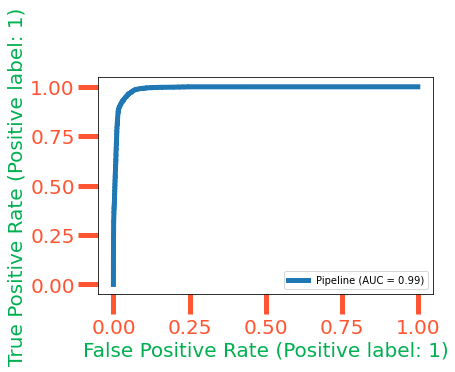

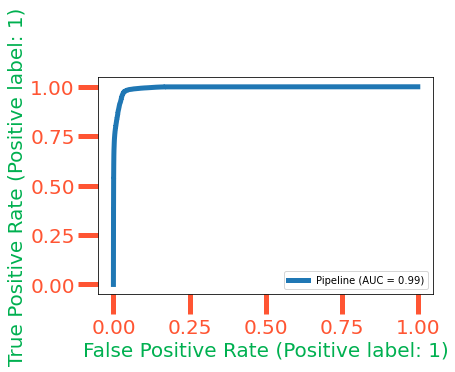

In [105]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(pipeline_baseline_1, X_test_1, y_test_1)
RocCurveDisplay.from_estimator(pipeline_baseline_2, X_test_2, y_test_2)

Довольно таки неплохо. Высокая метрика ROC-AUC при отсутствии дисбаланса классов говорит о том что мы корретно оцениваем вероятности принадлежности объектов классам, а значит коректно разделяем объекты гиперплостью в признаковом пространстве. Попробуем оценить обобщающую способность модели на кросс валидации:

In [107]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

splitter = KFold(n_splits=4, shuffle=True, random_state=33)

cv_result_1 = cross_validate(pipeline_baseline_1, 
                             action_train_1.drop(['result'], axis = 1), action_train_1['result'], 
                             scoring='roc_auc',
                             cv=splitter, return_train_score=True)

print(f"Средняя ROC-AUC первой модели на тренировочных фолдах: {np.mean(cv_result_1['train_score']).round(5)}")
print(f"Средняя ROC-AUC первой модели на тестовых фолдах: {np.mean(cv_result_1['test_score']).round(5)}")

cv_result_2 = cross_validate(pipeline_baseline_2, 
                             action_train_2.drop(['result'], axis = 1), action_train_2['result'], 
                             scoring='roc_auc',
                             cv=splitter, return_train_score=True)

print(f"Средняя ROC-AUC второй модели на тренировочных фолдах: {np.mean(cv_result_2['train_score']).round(5)}")
print(f"Средняя ROC-AUC второй модели на тестовых фолдах: {np.mean(cv_result_2['test_score']).round(5)}")

Средняя ROC-AUC первой модели на тренировочных фолдах: 0.9135
Средняя ROC-AUC первой модели на тестовых фолдах: 0.91096
Средняя ROC-AUC второй модели на тренировочных фолдах: 0.962
Средняя ROC-AUC второй модели на тестовых фолдах: 0.96113


Меньшее качество можно объяснить меньшим кол-вом данных для обучения при разбиении на фолды, так как мы указали кол-во фолдов 4 - 25% данных не попадают в трейн на кросс-валидации.

Если качество высокое то посмотрим в каком знаке метрика ROC будет отличать от другой модели, построим SVM, откаллибруем вероятности и сравним метрики моделей:

In [108]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr_1, tpr_1, thresholds = roc_curve(y_test_1, pipeline_baseline_1.predict_proba(X_test_1)[:, 1])
print(f'ROC-AUC первой модели: {auc(fpr_1, tpr_1)}')

fpr_2, tpr_2, thresholds = roc_curve(y_test_2, pipeline_baseline_2.predict_proba(X_test_2)[:, 1])
print(f'ROC-AUC второй модели: {auc(fpr_2, tpr_2)}')

ROC-AUC первой модели: 0.9902629840974814
ROC-AUC второй модели: 0.9941367329311392


In [109]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

pipeline_SVM_1 = Pipeline([('column_transformer', col_transform_1),
                           ('SVM', LinearSVC())])

pipeline_SVM_1.fit(X_train_1, y_train_1)

calibration_1 = CalibratedClassifierCV(pipeline_SVM_1, cv=5, method='sigmoid')
calibration_1.fit(X_train_1, y_train_1)

calibrated_probs_1 = calibration_1.predict_proba(X_test_1)[:, 1]

fpr_1, tpr_1, thresholds = roc_curve(y_test_1, calibrated_probs_1)
print(f'ROC-AUC первой SVM модели: {auc(fpr_1, tpr_1)}')

pipeline_SVM_2 = Pipeline([('column_transformer', col_transform_2),
                           ('SVM', LinearSVC())])

pipeline_SVM_2.fit(X_train_2, y_train_2)

calibration_2 = CalibratedClassifierCV(pipeline_SVM_2, cv=5, method='sigmoid')
calibration_2.fit(X_train_2, y_train_2)

calibrated_probs_2 = calibration_2.predict_proba(X_test_2)[:, 1]

fpr_2, tpr_2, thresholds = roc_curve(y_test_2, calibrated_probs_2)
print(f'ROC-AUC второй SVM модели: {auc(fpr_2, tpr_2)}')

ROC-AUC первой SVM модели: 0.9904109828956362
ROC-AUC второй SVM модели: 0.9936060972631632


Незначительное улучшение качества для первой модели и даже ухудшение для второй, вероятно это значит что данные настолько хорошо линейно разделимы, что SVM внося корректировку удаленности от ближайших объектов и не учитывая при этом объекты с теста, в результате дает меньшее качество, это возможно.

Оценить обощающую способность на кросс-валидации для SVM по метрике ROC-AUC не получится, так как данный метод некорректно оценивает вероятности и необходима их коллибровка. Но можно сравнить с обычной LogReg по метрике accuracy:

In [97]:
cv_result_1_LR = cross_validate(pipeline_baseline_1, 
                             action_train_1.drop(['result'], axis = 1), action_train_1['result'], 
                             scoring='accuracy',
                             cv=splitter, return_train_score=True)

print(f"Средняя Accuracy первой модели на тренировочных фолдах: {np.mean(cv_result_1_LR['train_score']).round(5)}")
print(f"Средняя Accuracy первой модели на тестовых фолдах: {np.mean(cv_result_1_LR['test_score']).round(5)}")

cv_result_1_SVM = cross_validate(pipeline_SVM_1, 
                             action_train_1.drop(['result'], axis = 1), action_train_1['result'], 
                             scoring='accuracy',
                             cv=splitter, return_train_score=True)

print(f"Средняя Accuracy первой SVM модели на тренировочных фолдах: {np.mean(cv_result_1_SVM['train_score']).round(5)}")
print(f"Средняя Accuracy первой SVM модели на тестовых фолдах: {np.mean(cv_result_1_SVM['test_score']).round(5)}")

cv_result_2_LR = cross_validate(pipeline_baseline_2, 
                             action_train_2.drop(['result'], axis = 1), action_train_2['result'], 
                             scoring='accuracy',
                             cv=splitter, return_train_score=True)

print(f"Средняя Accuracy второй LR модели на тренировочных фолдах: {np.mean(cv_result_2['train_score']).round(5)}")
print(f"Средняя Accuracy второй LR модели на тестовых фолдах: {np.mean(cv_result_2['test_score']).round(5)}")

cv_result_2_SVM = cross_validate(pipeline_SVM_2, 
                             action_train_2.drop(['result'], axis = 1), action_train_2['result'], 
                             scoring='accuracy',
                             cv=splitter, return_train_score=True)

print(f"Средняя Accuracy второй SVM модели на тренировочных фолдах: {np.mean(cv_result_2_SVM['train_score']).round(5)}")
print(f"Средняя Accuracy второй SVM модели на тестовых фолдах: {np.mean(cv_result_2_SVM['test_score']).round(5)}")

Средняя Accuracy первой модели на тренировочных фолдах: 0.84214
Средняя Accuracy первой модели на тестовых фолдах: 0.84054
Средняя Accuracy первой SVM модели на тренировочных фолдах: 0.86728
Средняя Accuracy первой SVM модели на тестовых фолдах: 0.86277
Средняя Accuracy второй LR модели на тренировочных фолдах: 0.962
Средняя Accuracy второй LR модели на тестовых фолдах: 0.96113
Средняя Accuracy второй SVM модели на тренировочных фолдах: 0.9473
Средняя Accuracy второй SVM модели на тестовых фолдах: 0.94516


Как и ранее, SVM показывает лучший результат для первой модели, но хуже для второй, я думаю это связано с тем что для первой модели данные в большей мере разделены линейно чем для второй, таким образом приходящие тестовые объекты чаще оказываются в соответсвующем себе классе предсказанном моделью, также в случае со второй моделью на тесте при кросс-валидации приходит достаточно большое кол-во объектов(25%), которые не были учтены при построении SVM, и как следствие большее кол-во объектов может оказаться в противоположном своему классу подпространстве в зависимости от предсказания модели.

### Финальная модель

Можно подвести итог, так как данные очень хорошо линейно разделимы(мы убедились в этом глядя на качество модели логистической регрессии) и даже SVM дает не колоссальный прирост в качестве для первой модели и даже меньшее качество для второй, как на трейн/тесте так и на кросс-валидации. То нет необходимости строить метрические модели, решающие деревья, ансамблевые или бустинги. Они будут в той же степени хорошо классифицировать объекты, да, возможно они смогут зафиксировать более сложные зависимости и не ошибиться на тех объектах, объектах на которых ошиблась логистическая регрессия, но процент таких объектов катастрофически мал. 

Следовательно если нам понадобится с лёту переобучать модель на новых данных собраных в real time и добиваться быстродействия сервиса, то использование обычной логистической регрессии предпочтительнее.

Напишем функцию которую можно будет использовать в скрипте для переобучения модели на новых данных:

In [113]:
import pickle

def train_model(action_path: str, person_path: str):
    
    action = pd.read_csv(action_path, index_col=0)
    person = pd.read_csv(person_path, index_col=0)
    
    action = action.merge(person, how='left', on='person_id')
    
    action["date_x"] = pd.to_datetime(action["date_x"])
    action['date_x_year']= action['date_x'].apply(lambda x: x.year)
    action['date_x_month'] = action['date_x'].apply(lambda x: x.month)
    action['date_x_day'] = action['date_x'].apply(lambda x: x.day)

    action["date_y"] = pd.to_datetime(action["date_y"])
    action['date_y_year']= action['date_y'].apply(lambda x: x.year)
    action['date_y_month'] = action['date_y'].apply(lambda x: x.month)
    action['date_y_day'] = action['date_y'].apply(lambda x: x.day)

    action['difference'] = (action['date_x'] - action['date_y']).dt.days
    
    action.drop(['date_x', 'date_y'], axis=1, inplace=True)
    
    action_1 = action[action['action_type'] == 'type 1']
    action_2 = action[action['action_type'] != 'type 1']
    
    action_1 = action_1.drop(['person_id', 'action_id', 'char_10_x', 'action_type'], axis=1)
    action_2 = action_2.drop(['person_id', 'action_id', 'char_1_x', 'char_2_x',
                              'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x',
                              'char_7_x', 'char_8_x', 'char_9_x'], axis=1)
    
    X_1, y_1 = action_1.drop(['result'], axis = 1), action_1['result']
    X_1 = X_1.astype(object)
    X_2, y_2 = action_2.drop(['result'], axis = 1), action_2['result']
    X_2 = X_2.astype(object)

    categorical_columns_1 = X_1.columns
    categorical_columns_2 = X_2.columns
    
    cols_for_ohe_1 = [x for x in categorical_columns_1 if X_1[x].nunique() < 10]
    cols_for_mte_1 = [x for x in categorical_columns_1 if X_1[x].nunique() >= 10]

    cols_for_ohe_2 = [x for x in categorical_columns_2 if X_2[x].nunique() < 10]
    cols_for_mte_2 = [x for x in categorical_columns_2 if X_2[x].nunique() >= 10]

    cols_for_ohe_1_idx = [list(X_1.columns).index(col) for col in cols_for_ohe_1]
    cols_for_mte_1_idx = [list(X_1.columns).index(col) for col in cols_for_mte_1]

    cols_for_ohe_2_idx = [list(X_2.columns).index(col) for col in cols_for_ohe_2]
    cols_for_mte_2_idx = [list(X_2.columns).index(col) for col in cols_for_mte_2]
    
    t_1 = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_1_idx),
           ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_1_idx)]

    t_2 = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_2_idx),
           ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_2_idx)]

    col_transform_1 = ColumnTransformer(transformers=t_1)
    col_transform_2 = ColumnTransformer(transformers=t_2)
    
    pipeline_1 = Pipeline([('column_transformer', col_transform_1),
                                    ('LR', LogisticRegression())])

    pipeline_1.fit(X_1, y_1)
    
    pipeline_2 = Pipeline([('column_transformer', col_transform_2),
                                    ('LR', LogisticRegression())])

    pipeline_2.fit(X_2, y_2)
    
    filename_1 = 'Sber_LR_model_type_1.pkl'
    filename_2 = 'Sber_LR_model_type_2_7.pkl'
    
    pickle.dump(pipeline_1, open(filename_1, 'wb'))
    pickle.dump(pipeline_2, open(filename_2, 'wb'))
    
    return

Проверим корректно ли работает функция:

In [133]:
train_model('data/action_train.csv', 'data/person.csv')

Замечательно, теперь можно переиспользовать предобученные модели для выдачи предсказаний.

Напишем функцию для выдачи предсказаний:

In [134]:
def predict(action_path: str):
    
    action = pd.read_csv(action_path, index_col=0)
    person = pd.read_csv("data/person.csv", index_col=0)
    
    action = action.merge(person, how='left', on='person_id')
    
    action["date_x"] = pd.to_datetime(action["date_x"])
    action['date_x_year']= action['date_x'].apply(lambda x: x.year)
    action['date_x_month'] = action['date_x'].apply(lambda x: x.month)
    action['date_x_day'] = action['date_x'].apply(lambda x: x.day)

    action["date_y"] = pd.to_datetime(action["date_y"])
    action['date_y_year']= action['date_y'].apply(lambda x: x.year)
    action['date_y_month'] = action['date_y'].apply(lambda x: x.month)
    action['date_y_day'] = action['date_y'].apply(lambda x: x.day)

    action['difference'] = (action['date_x'] - action['date_y']).dt.days
    
    action.drop(['date_x', 'date_y'], axis=1, inplace=True)
    
    action_1 = action[action['action_type'] == 'type 1']
    action_2 = action[action['action_type'] != 'type 1']
    
    action_1 = action_1.drop(['person_id', 'action_id', 'char_10_x', 'action_type'], axis=1)
    action_2 = action_2.drop(['person_id', 'action_id', 'char_1_x', 'char_2_x',
                              'char_3_x', 'char_4_x', 'char_5_x', 'char_6_x',
                              'char_7_x', 'char_8_x', 'char_9_x'], axis=1)
    
    action_1 = action_1.astype(object)
    action_2 = action_2.astype(object)
    
    filename_1 = 'Sber_LR_model_type_1.pkl'
    filename_2 = 'Sber_LR_model_type_2_7.pkl'
    
    loaded_model_1 = pickle.load(open(filename_1, 'rb'))
    loaded_model_2 = pickle.load(open(filename_2, 'rb'))

    predict_proba_1 = loaded_model_1.predict_proba(action_1)[:, 1]
    predict_proba_2 = loaded_model_2.predict_proba(action_2)[:, 1]
    
    action.loc[action['action_type'] == 'type 1', ['result']] = predict_proba_1
    action.loc[action['action_type'] != 'type 1', ['result']] = predict_proba_2
    
    action[['action_id', 'result']].to_csv('result_predict_proba.csv', index = False)
    
    return

In [135]:
predict('data/action_test.csv')

In [136]:
result_predict_proba = pd.read_csv('result_predict_proba.csv')
result_predict_proba.head()

,action_id,result
0,act1_249281,0.350196
1,act2_230855,0.118337
2,act1_240724,0.917405
3,act1_83552,0.930966
4,act2_1043301,0.992471


### Куда улучшать?

В случае если было бы необходимо решать задачу предсказаний на будущее возможно необходимо было бы как я уже говорил раньше обучаться не на всем временном промежутке, а на нескольких по времени в зависимости от необходимого предсказания, так как кажется что если необходимо предсказывать на месяц вперед, то не так уж и важно что было 4 года назад, опять же зависит от задачи и данных, необходимо эксперементировать и в данном случае пользоваться делением посредством TimeSeriesSplit.

Если данные были бы плохо разделимы линейно, нужно было прибегнуть другим моделям, метрическим, возможно решающим деревьям или ансамблевым, в крайнем случае бустингам.

Также для улучшения качества можно было бы понизить размерность признакового пространства и кластеризовать объекты, рассчитав расстояние от кластеров до определенного кластера можно было бы использовать в качестве дополнительного признака к уже существующим. Касаемо генерации других полезных признаков желательно знать расшифровку параметров и характер бизнеса.